# **=========================== PREREQUISITES ===========================**

## **Install all packages and libraries**

In [ ]:
import glob
import os, shutil
# from utils.plots import plot_results
import PIL.Image
import PIL.Image
from IPython.display import Image, display
import torch

## **Install Dependencies**

In [ ]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
!git reset --hard 064365d8683fd002e9ad789c1e91fa3d021b44f0

Cloning into 'yolov5'...
remote: Enumerating objects: 16008, done.
remote: Total 16008 (delta 0), reused 0 (delta 0), pack-reused 16008
Receiving objects: 100% (16008/16008), 14.57 MiB | 17.29 MiB/s, done.
Resolving deltas: 100% (11008/11008), done.
/content/yolov5
HEAD is now at 064365d Update parse_opt() in export.py to work as in train.py (#10789)


In [ ]:
# install dependencies as necessary
!pip install -qr requirements.txt  # install dependencies (ignore errors)

from IPython.display import Image, clear_output  # to display images
from utils.downloads import attempt_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.6 MB/s eta 0:00:00
Setup complete. Using torch 2.0.1+cu118 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15101MB, multi_processor_count=40)


## **Download Correctly Formatted Custom Dataset**

In [ ]:
#follow the link below to get your download code from from Roboflow
# !mkdir yolov5
%cd /content/yolov5/data/

!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="8FfcpEXqZ5exoOKSuyvi")
project = rf.workspace("catheterproject").project("cath2")
dataset = project.version(3).download("yolov5")
# # dataset = project.version(2).download("yolov5-obb")
# # dataset = project.version(2).download("yolov8")

/content/yolov5/data
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.6 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=e019f7fa6812199ba2ba25d6ade63b10c3f289da60184ccd134117630cee8307
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsing-3.1.0:
      Successfully uninstalled pyparsing-3.1.0
  Attempting uninst

loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to Cath2-3 in yolov5pytorch:: 100%|██████████| 2870/2870 [00:00<00:00, 3434.31it/s]


In [ ]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat {dataset.location}/data.yaml

names:
- bend
- entry
- marker
- tip
nc: 4
roboflow:
  license: Public Domain
  project: cath2
  url: https://universe.roboflow.com/catheterproject/cath2/dataset/3
  version: 3
  workspace: catheterproject
test: ../test/images
train: Cath2-3/train/images
val: Cath2-3/valid/images


## **Rename all files to be in accordance with marker labels**

Before anything load the labels' excell file "corrected_augment_5x_all.xlsx" and "finalUtils.py" files in path "/content/yolov5/data/Cath2-3"

In [ ]:
# Rename all roboflow files for similarity to label

import os

def renaming(p):
  for directname, directnames, files in os.walk(p):
      for f in files:
          # Split the file into the filename and the extension, as separate variables
          # print(f)
          f1, e1 = os.path.splitext(f)
          f2, e2 = os.path.splitext(f1)
          f3, e3 = os.path.splitext(f2)
          f4 = f3.rsplit('_', 1)[0]
          # print(f4)
          # new_name = os.path.join(path, f4 + e1)
          # print (new_name)

          # rename filename
          new_name = os.rename(
                  os.path.join(p, f),
                  os.path.join(p, f4 + e1))

In [ ]:
path1 = '/content/yolov5/data/Cath2-3/test/images'
path2 = '/content/yolov5/data/Cath2-3/train/images'
path3 = '/content/yolov5/data/Cath2-3/valid/images'
path4 = '/content/yolov5/data/Cath2-3/test/labels'
path5 = '/content/yolov5/data/Cath2-3/train/labels'
path6 = '/content/yolov5/data/Cath2-3/valid/labels'
renaming(path1)
renaming(path2)
renaming(path3)
renaming(path4)
renaming(path5)
renaming(path6)

## **Define Model Configuration and Architecture**

In [ ]:
# define number of classes based on YAML
import yaml
with open(dataset.location + "/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
num_classes

'4'

In [ ]:
#this is the model configuration we will use
%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [ ]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [ ]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

# **=========================== TRAIN SECTION ===========================**

# **Train Custom YOLOv5 Detector**

Here, we are able to pass a number of arguments:

    img: define input image size
    batch: determine batch size
    epochs: define the number of training epochs. (Note: often, 3000+ are common here!)
    data: set the path to our yaml file
    cfg: specify our model configuration
    weights: specify a custom path to weights. (Note: you can download weights from the Ultralytics Google Drive folder)
    name: result names
    nosave: only save the final checkpoint
    cache: cache images for faster training


#### **Please revise data.yaml to the following path in the respective folder!**

test: /content/yolov5/data/Cath2-1/test/images

train: /content/yolov5/data/Cath2-1/train/images

val: /content/yolov5/data/Cath2-1/valid/images


### **Training yolov5**

In [ ]:
# train yolov5s on custom data for 300 epochs
# time its performance
%%time
%cd /content/yolov5
!python train.py --img 416 --batch 32 --epochs 300 --data {dataset.location}/data.yaml --cfg ./models/custom_yolov5s.yaml --weights '' --name yolov5s_results  --cache
# !python train.py --img 416 --batch 16 --epochs 100 --data {dataset.location}/data.yaml --weights yolo5s.pt --cache
# !python train.py --img 512 --batch 16 --epochs 100 --data {dataset.location}/data.yaml --cfg /content/yolov5/models/custom_yolov5s.yaml --weights '' --name yolov5s_results  --cache


/content/yolov5
2023-06-29 12:29:40.573408: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-29 12:29:41.416973: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=, cfg=./models/custom_yolov5s.yaml, data=/content/yolov5/data/Cath2-3/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_perio

### **Evaluate Custom YOLOv5 Detector Performance**

In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs
# %reload_ext tensorboard

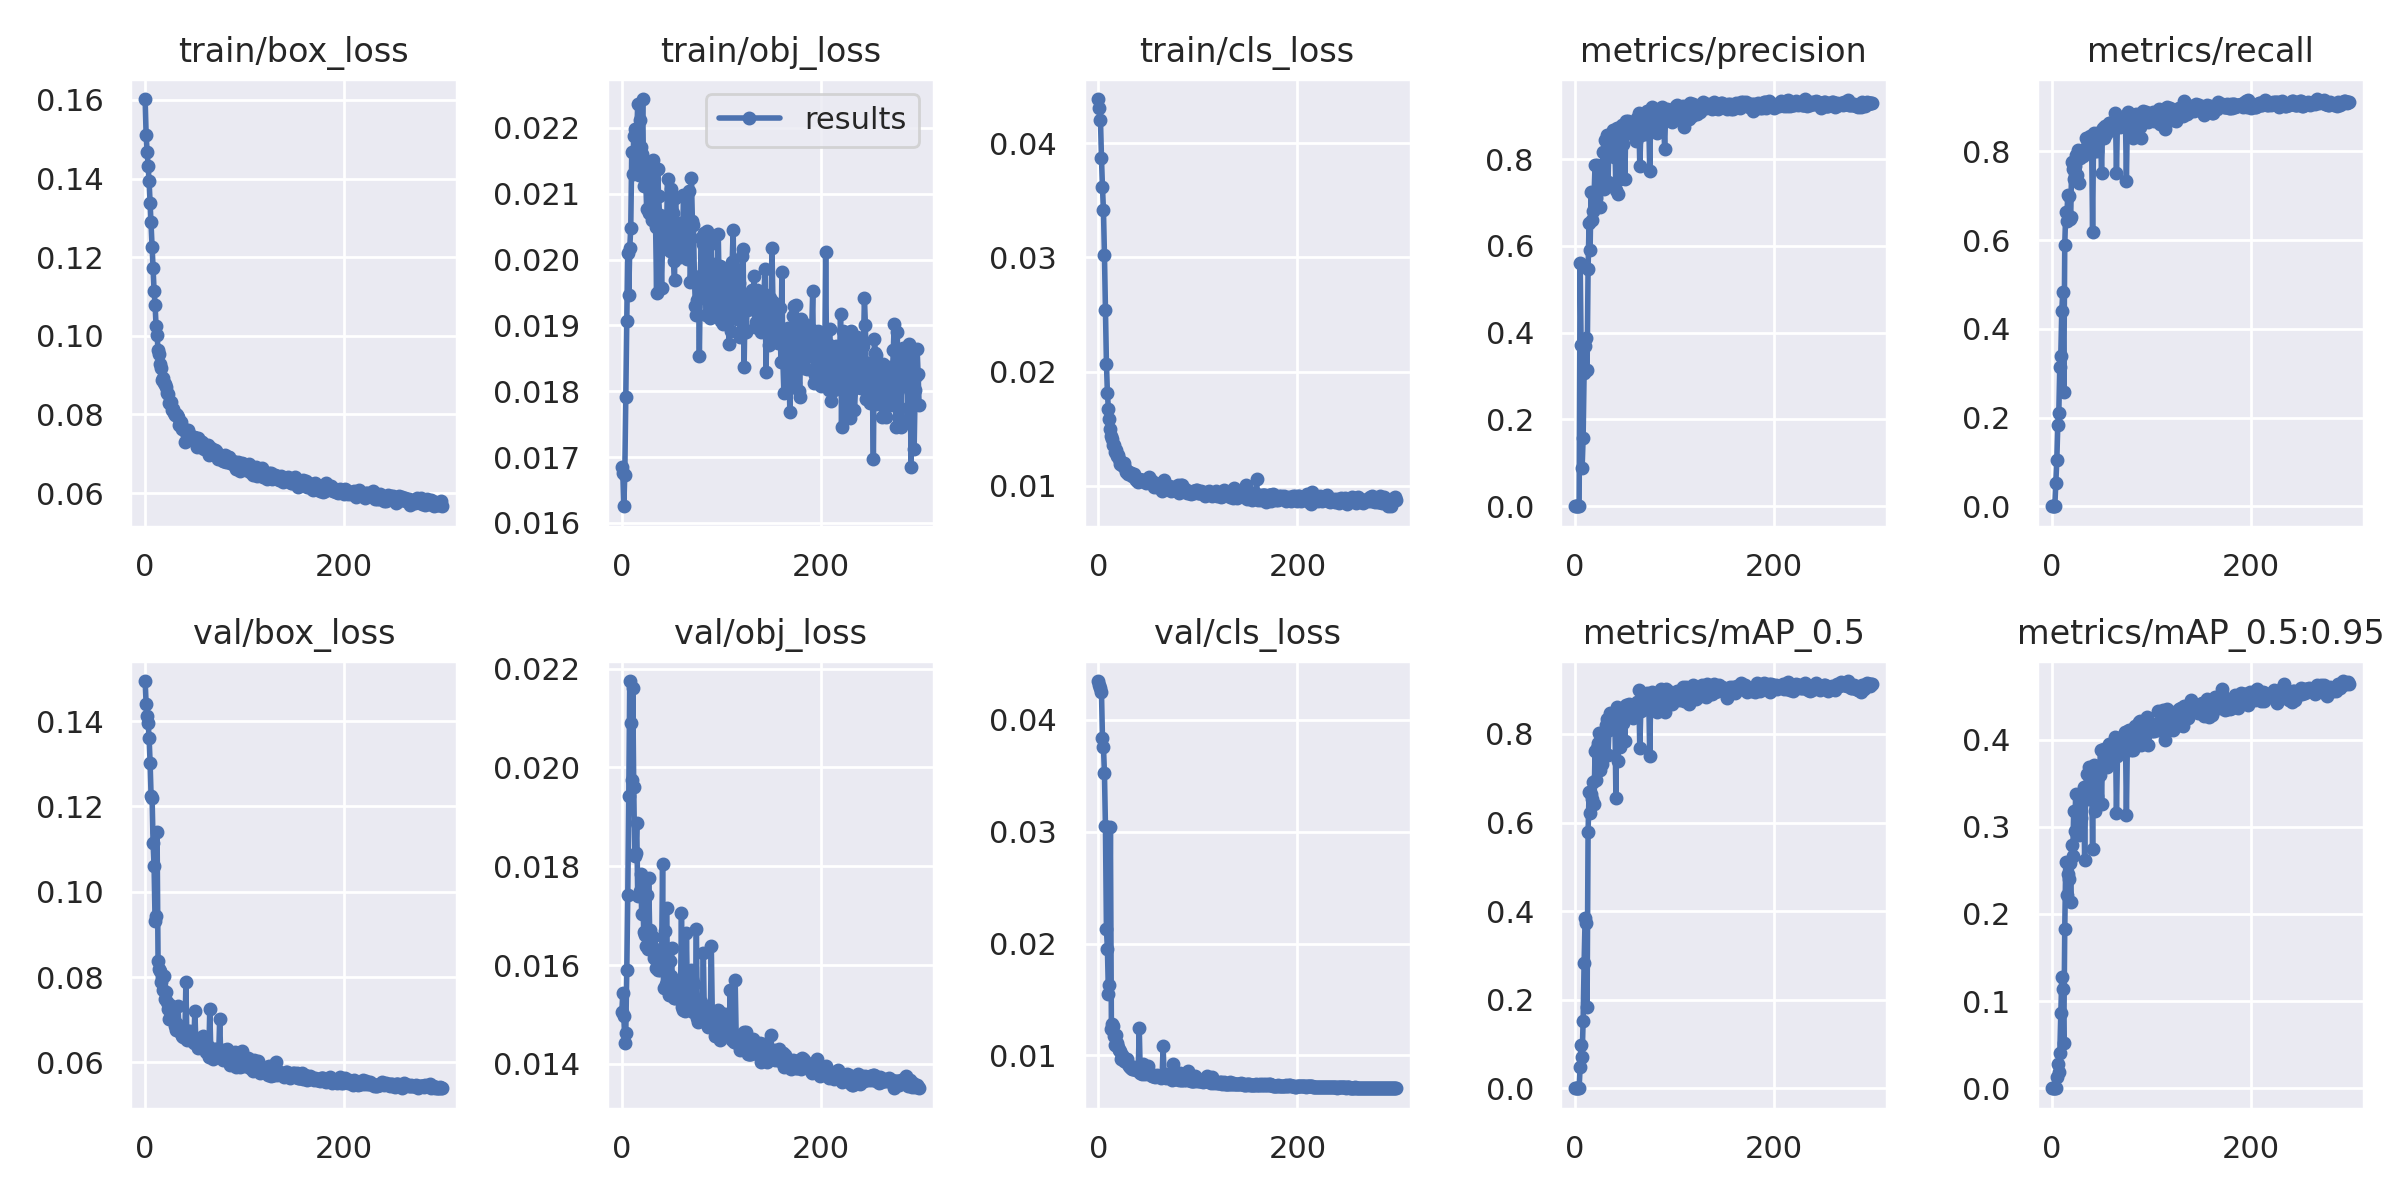

In [ ]:
# Output graphs in case of non-responsive tensor board

import PIL.Image
PIL.Image.open('/content/yolov5/runs/train/yolov5s_results/results.png').convert("RGB")

### **Visualize Our Training Data with Labels**

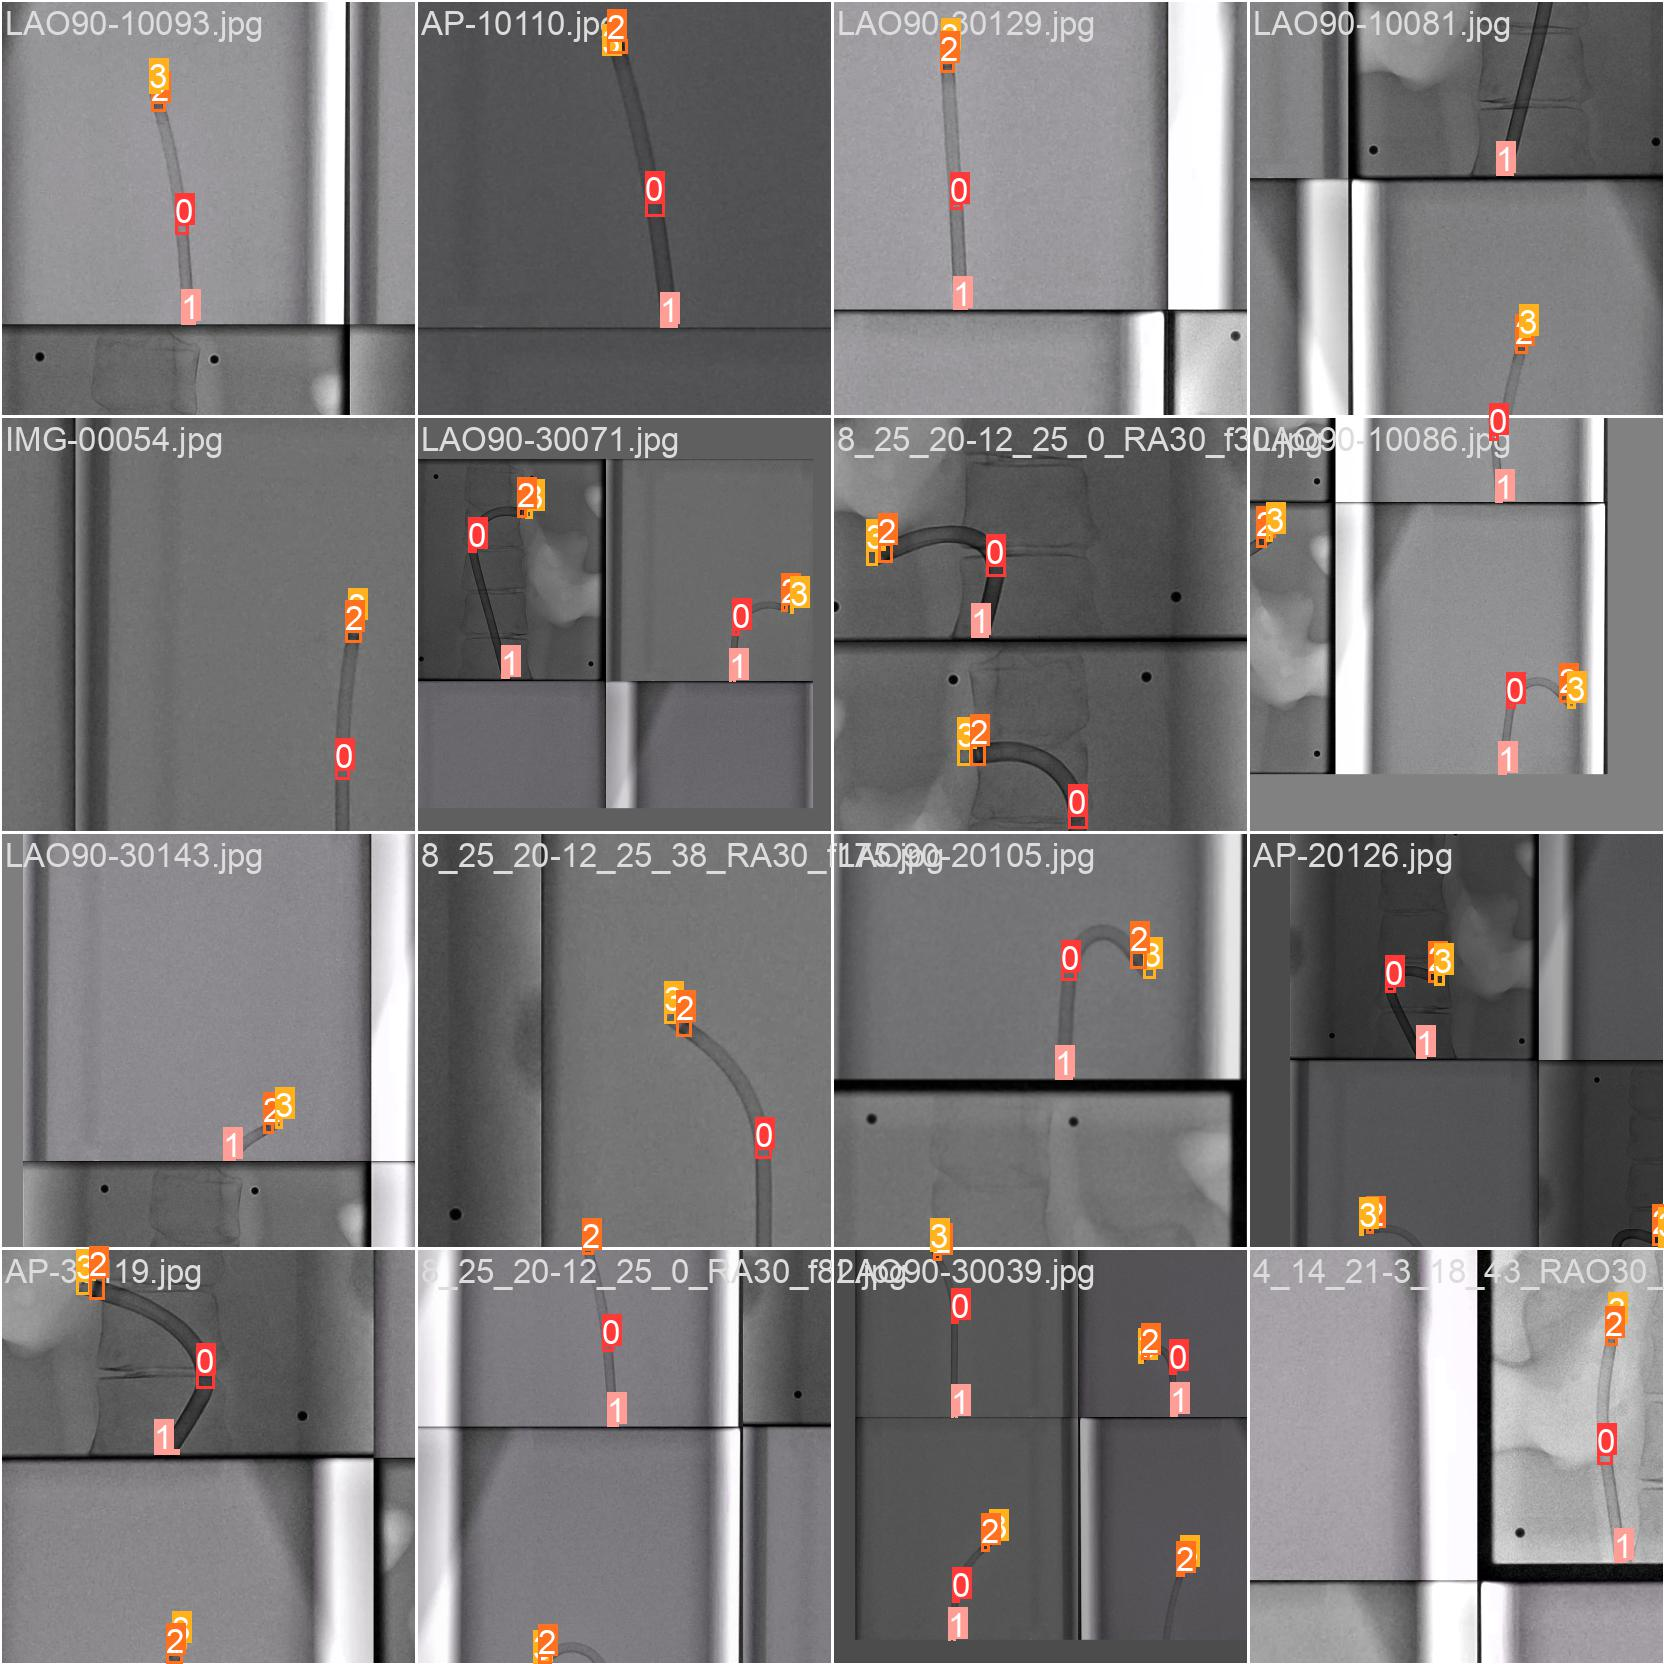

In [ ]:
# print out train_batch0
Image(filename='/content/yolov5/runs/train/yolov5s_results/train_batch0.jpg', width=900)

In [ ]:
print("GROUND TRUTH VALIDATION DATA:")
PIL.Image.open('/content/yolov5/runs/train/yolov5s_results/val_batch0_labels.jpg').convert("RGB")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Save the yolov5 content to drive for inference and future use
from google.colab import drive
drive.mount('/content/drive')
!cp -r "/content/yolov5" "/content/drive/MyDrive/1429"

Mounted at /content/drive


# **========================= INFERENCE SECTION =========================**

# **Inference**

In [ ]:
# Mount drive to load all samples, train model and GT
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# trained weights are saved by default in our weights folder
# %ls runs/
%ls drive/MyDrive/1429/yolov5/runs/

detect/  train/


In [ ]:
# %ls runs/train/yolov5s_results/weights
%ls drive/MyDrive/1429/yolov5/runs/train/yolov5s_results/weights

best.pt  last.pt


### **FIND LABELS FOR ALL TEST IMAGES**

In [ ]:
import os
def findLabel(path):
  img_dict = {};
  # nested_dict = { 'file_name': {'key_1': 'value_1'},
                # 'dictB': {'key_2': 'value_2'}}
  for id, BBfileName in enumerate(os.listdir(path)):
    # print(id, BBfileName)
    # Insert file name in dictionary
    img_dict[BBfileName]={}

    # Open relevant txt file and find the associated BB labels to test image
    fl = open(path + BBfileName, 'r')
    data = fl.readlines()
    # print(data)
    fl.close()
    # Save each centroid of each BB in the dict
    for dt in data:
      # print('BBfileName:', BBfileName)
      # print('dt:', dt)
      dt = dt.strip()
      # Split string to float and find (x,y) and (w,h)
      _, xx, yy, ww, hh = map(float, dt.split(' '))
      if(dt[0] == '0'):
        # print(dt)
        # Save middle of the BB (prediction)
        img_dict[BBfileName]['cx_0']=xx
        img_dict[BBfileName]['cy_0']=yy
      elif(dt[0] == '1'):
        img_dict[BBfileName]['cx_1']=xx
        img_dict[BBfileName]['cy_1']=yy
      elif(dt[0] == '2'):
        img_dict[BBfileName]['cx_2']=xx
        img_dict[BBfileName]['cy_2']=yy
      elif(dt[0] == '3'):
        img_dict[BBfileName]['cx_3']=xx
        img_dict[BBfileName]['cy_3']=yy

  return(img_dict)


In [ ]:
p_lbl = "/content/drive/MyDrive/1429/yolov5/data/Cath2-3/test/labels/"
lbl = findLabel(p_lbl)
for i in lbl:
    # display
    print(i,lbl[i])

4_14_21-3_17_07_LAO56_f100.txt {'cx_1': 0.30859375, 'cy_1': 0.98828125, 'cx_0': 0.3125, 'cy_0': 0.9140625, 'cx_2': 0.2875, 'cy_2': 0.47578125, 'cx_3': 0.284375, 'cy_3': 0.44609375}
4_14_21-3_17_07_LAO56_f140.txt {'cx_2': 0.2703125, 'cy_2': 0.25, 'cx_3': 0.271875, 'cy_3': 0.22265625, 'cx_1': 0.30625, 'cy_1': 0.98984375, 'cx_0': 0.3, 'cy_0': 0.69296875}
4_14_21-3_17_07_LAO56_f120.txt {'cx_3': 0.2796875, 'cy_3': 0.16796875, 'cx_2': 0.275, 'cy_2': 0.1953125, 'cx_1': 0.303125, 'cy_1': 0.98984375, 'cx_0': 0.29765625, 'cy_0': 0.67890625}
4_14_21-3_17_07_LAO56_f85.txt {'cx_3': 0.259375, 'cy_3': 0.4546875, 'cx_2': 0.26640625, 'cy_2': 0.48359375, 'cx_1': 0.3078125, 'cy_1': 0.98984375, 'cx_0': 0.3109375, 'cy_0': 0.9359375}
4_14_21-3_17_07_LAO56_f65.txt {'cx_1': 0.31953125, 'cy_1': 0.98828125, 'cx_0': 0.33125, 'cy_0': 0.8078125, 'cx_3': 0.2859375, 'cy_3': 0.5765625, 'cx_2': 0.296875, 'cy_2': 0.5890625}
4_14_21-3_17_07_LAO56_f90.txt {'cx_3': 0.2828125, 'cy_3': 0.45, 'cx_2': 0.28828125, 'cy_2': 0.48

In [ ]:
# Clarifying the number of GT fields
len(lbl)

### **FIND PREDICTIONS FOR ALL TEST IMAGES**

In [ ]:
# # If you intend to remove a certain inference folder uncomment the two below commands
# import shutil
# shutil.rmtree('/content/drive/MyDrive/1429/yolov5/runs/detect/exp2')

In [ ]:
# Please run this once- After first detection run, use only for further experiments
# Results will be saved in exp(#) folders with confidece, crops and BB prediction text files
%cd drive/MyDrive/1429/yolov5/
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.0001 --source data/Cath2-3/test/images --save-crop --save-txt --save-conf

[Errno 2] No such file or directory: 'drive/MyDrive/1429/yolov5/'
/content/yolov5
detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=data/Cath2-3/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.0001, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
custom_YOLOv5s summary: 182 layers, 7254609 parameters, 0 gradients
image 1/241 /content/yolov5/data/Cath2-3/test/images/4_14_21-3_17_07_LAO56_f100.jpg: 416x416 58 bends, 36 entrys, 10 markers, 14 tips, 8.0ms
image 2/241 /content/yolov5/data/Cath2-3/test/images/4_14_21-3_17_07_LAO56_f120.jpg: 416x416 71 bends, 52 entrys

In [ ]:
# %cd drive/MyDrive/1429/yolov5/
# !python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.7 --source data/Cath2-3/test/images --classes 0 --save-crop --save-txt --save-conf

#### **Find highest confidence for each sample and save to variable**

In [ ]:
import os
def findResult(path):
  fileDictionary = {};
  # nested_dict = { 'file_name': {'key_1': 'value_1'},
                # 'dictB': {'key_2': 'value_2'}}
  for id, BBfileName in enumerate(os.listdir(path)):
    # print(id, BBfileName)
    # Insert file name in dictionary
    fileDictionary[BBfileName]={}
    fileDictionary[BBfileName]['0'] = {}
    fileDictionary[BBfileName]['1'] = {}
    fileDictionary[BBfileName]['2'] = {}
    fileDictionary[BBfileName]['3'] = {}

    # Open relevant txt file and find the associated BB labels to test image
    fl = open(path + BBfileName, 'r')
    data = fl.readlines()
    # print(data)
    fl.close()
    # Save each centroid of each BB in the dict
    for dt in data:
      # print('BBfileName:', BBfileName)
      # print('dt:', dt)
      dt = dt.strip()
      # Split string to float and find (x,y) and (w,h)
      cl, xx, yy, ww, hh, conf = map(float, dt.split(' '))
      # print(cl, xx, yy, ww, hh, conf)
      cl = str(int(cl))
      # print(cl)
      oldClDictionary = fileDictionary[BBfileName][cl]

      max_conf = -1
      best_xx = -1
      best_yy = -1
      best_ww = -1
      best_hh = -1

      if(len(oldClDictionary)>0 and conf<oldClDictionary['cnf']):
        max_conf = oldClDictionary['cnf']
        best_xx = oldClDictionary['xx']
        best_yy = oldClDictionary['yy']
        best_ww = oldClDictionary['ww']
        best_hh = oldClDictionary['hh']

      # # if(oldClDictionary != {}):
      #   if(conf < oldClDictionary['cnf']):
      #     max_conf = oldClDictionary['cnf']
      #     best_xx = oldClDictionary['xx']
      #     best_yy = oldClDictionary['yy']
      #     best_ww = oldClDictionary['ww']
      #     best_hh = oldClDictionary['hh']
      #   else:
      #     max_conf = conf
      #     best_xx = xx
      #     best_yy = yy
      #     best_ww = ww
      #     best_hh = hh
      else:
        max_conf = conf
        best_xx = xx
        best_yy = yy
        best_ww = ww
        best_hh = hh

      newClDictionary = {}
      newClDictionary['cnf'] = max_conf
      newClDictionary['xx'] = best_xx
      newClDictionary['yy'] = best_yy
      newClDictionary['ww'] = best_ww
      newClDictionary['hh'] = best_hh

      fileDictionary[BBfileName][cl] = newClDictionary

  return(fileDictionary)

In [ ]:
resultPath = "/content/drive/MyDrive/1429/yolov5/runs/detect/exp/labels/"
pred = findResult(resultPath)
for j in pred:
    print(j,pred[j])

4_14_21-3_17_07_LAO56_f100.txt {'0': {'cnf': 0.0909101, 'xx': 0.309375, 'yy': 0.875781, 'ww': 0.0375, 'hh': 0.0453125}, '1': {'cnf': 0.672524, 'xx': 0.307813, 'yy': 0.990625, 'ww': 0.0375, 'hh': 0.009375}, '2': {'cnf': 0.857008, 'xx': 0.286719, 'yy': 0.475781, 'ww': 0.0359375, 'hh': 0.0234375}, '3': {'cnf': 0.74517, 'xx': 0.283594, 'yy': 0.446875, 'ww': 0.0359375, 'hh': 0.0125}}
4_14_21-3_17_07_LAO56_f120.txt {'0': {'cnf': 0.453377, 'xx': 0.296094, 'yy': 0.655469, 'ww': 0.0390625, 'hh': 0.0296875}, '1': {'cnf': 0.755074, 'xx': 0.302344, 'yy': 0.988281, 'ww': 0.0390625, 'hh': 0.0109375}, '2': {'cnf': 0.858983, 'xx': 0.274219, 'yy': 0.196094, 'ww': 0.0359375, 'hh': 0.0203125}, '3': {'cnf': 0.776641, 'xx': 0.278125, 'yy': 0.16875, 'ww': 0.034375, 'hh': 0.0125}}
4_14_21-3_17_07_LAO56_f140.txt {'0': {'cnf': 0.122779, 'xx': 0.267969, 'yy': 0.442969, 'ww': 0.0390625, 'hh': 0.0328125}, '1': {'cnf': 0.780636, 'xx': 0.305469, 'yy': 0.9875, 'ww': 0.0390625, 'hh': 0.009375}, '2': {'cnf': 0.792729,

In [ ]:
# Clarifying the number of PREDICTION fields
len(pred)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# !cp -r "/content/yolov5" "/content/drive/MyDrive/1429"

### **Make a second dictionary just for LAO and AP**

In [ ]:
pred2 = {};
for id,value in pred.items():
  if id.startswith('AP') or id.startswith('LAO'):
    # print(id)
    pred2[id] = value

In [ ]:
print(len(pred2))
print(pred2)

134
{'AP-10003.txt': {'0': {'cnf': 0.769605, 'xx': 0.58125, 'yy': 0.779688, 'ww': 0.034375, 'hh': 0.025}, '1': {'cnf': 0.0721386, 'xx': 0.567187, 'yy': 0.996875, 'ww': 0.028125, 'hh': 0.00625}, '2': {'cnf': 0.86511, 'xx': 0.789844, 'yy': 0.603906, 'ww': 0.0234375, 'hh': 0.0328125}, '3': {'cnf': 0.713025, 'xx': 0.823438, 'yy': 0.598437, 'ww': 0.0125, 'hh': 0.03125}}, 'AP-10004.txt': {'0': {'cnf': 0.761967, 'xx': 0.582031, 'yy': 0.782031, 'ww': 0.0328125, 'hh': 0.0265625}, '1': {'cnf': 0.0493525, 'xx': 0.569531, 'yy': 0.996875, 'ww': 0.0296875, 'hh': 0.00625}, '2': {'cnf': 0.866753, 'xx': 0.802344, 'yy': 0.645312, 'ww': 0.0234375, 'hh': 0.03125}, '3': {'cnf': 0.802723, 'xx': 0.8375, 'yy': 0.648438, 'ww': 0.0125, 'hh': 0.028125}}, 'AP-10016.txt': {'0': {'cnf': 0.747674, 'xx': 0.583594, 'yy': 0.783594, 'ww': 0.0328125, 'hh': 0.0265625}, '1': {'cnf': 0.0560765, 'xx': 0.570312, 'yy': 0.996875, 'ww': 0.028125, 'hh': 0.00625}, '2': {'cnf': 0.869919, 'xx': 0.785937, 'yy': 0.7, 'ww': 0.03125, 'h

### **Make a third and fourth dictionary just for samples with a higher confidence than 0.6 for the original and LAO90&AP only datasets**

In [ ]:
def get_conf_thresh_values(conf,class_list,dc):
  ret_dict = {}
  for id,value in dc.items():
    file_dict = {}
    violates = False
    for id_in, value_in in value.items():
      if not id_in in class_list:
        continue
      if value_in['cnf'] <  conf:
        violates = True
        break
      file_dict[id_in] = value_in
    if violates == True:
      continue
    ret_dict[id] = file_dict
  return ret_dict

In [ ]:
pred3_0 = get_conf_thresh_values(0.7,['0'],pred)
pred4_0 = get_conf_thresh_values(0.7,['0'],pred2)

In [ ]:
pred3_1 = get_conf_thresh_values(0.005,['1'],pred)
pred4_1 = get_conf_thresh_values(0.005,['1'],pred2)

In [ ]:
pred3_2 = get_conf_thresh_values(0.7,['2'],pred)
pred4_2 = get_conf_thresh_values(0.7,['2'],pred2)

In [ ]:
pred3_3 = get_conf_thresh_values(0.7,['3'],pred)
pred4_3 = get_conf_thresh_values(0.7,['3'],pred2)

In [ ]:
print('All images [', len(pred), '] + conf. threshold:')
print(len(pred3_0))
print(len(pred3_1))
print(len(pred3_2))
print(len(pred3_3))

print('\n')
print('LAO90/AP images [', len(pred2), '] + conf. threshold:')
print(len(pred4_0))
print(len(pred4_1))
print(len(pred4_2))
print(len(pred4_3))

All images [ 241 ] + conf. threshold:
153
220
233
222


LAO90/AP images [ 134 ] + conf. threshold:
105
113
129
127


# **======================= RESULT ANALYSIS SECTION ======================**

## **MARKER PREDICTION**

### **Calculate the distance between prediction & GT**

In [ ]:
# Extract label and prediction from respective dictionary and find pairwise distance
import numpy as np

def calc_distance_m(lbl, prd):
  dist_list_2 = []
  k_ls = []
  prd_cx_2_ls = []
  prd_cy_2_ls = []
  lbl_cx_2_ls = []
  lbl_cy_2_ls = []

  for k in prd:
    prd_cx_2 = prd[k]['2']['xx']*614
    prd_cy_2 = prd[k]['2']['yy']*614
    lbl_cx_2 = lbl[k]['cx_2']*614
    lbl_cy_2 = lbl[k]['cy_2']*614

    # Store predictions and labels in lists
    k_ls.append(k)
    prd_cx_2_ls.append(prd_cx_2)
    prd_cy_2_ls.append(prd_cy_2)
    lbl_cx_2_ls.append(lbl_cx_2)
    lbl_cy_2_ls.append(lbl_cy_2)


    dist_2 = np.power((np.power((prd_cx_2-lbl_cx_2),2) + np.power((prd_cy_2-lbl_cy_2),2)),0.5)
    dist_list_2.append(dist_2)
  # print(k, dist_list)
  return dist_list_2,prd_cx_2_ls,prd_cy_2_ls,lbl_cx_2_ls,lbl_cy_2_ls, k_ls

In [ ]:
# Distance for label vs prediction all samples + no conf. threshold
distList_2, ls_pred_2_x, ls_pred_2_y, ls_lbl_2_x, ls_lbl_2_y, path_k_2 = calc_distance_m(lbl,pred)

In [ ]:
# Distance for label vs prediction LAO90/AP samples + no conf. threshold
distList_2_2,ls_pred_2_2_x, ls_pred_2_2_y, ls_lbl_2_2_x, ls_lbl_2_2_y, path_k_2_2 = calc_distance_m(lbl,pred2)

In [ ]:
# Distance for label vs prediction all samples + conf. threshold
distList_3_2,ls_pred_3_2_x, ls_pred_3_2_y, ls_lbl_3_2_x, ls_lbl_3_2_y, path_k_3_2 = calc_distance_m(lbl,pred3_2)

In [ ]:
# Distance for label vs prediction LAO90/AP samples + conf. threshold
distList_4_2,ls_pred_4_2_x, ls_pred_4_2_y, ls_lbl_4_2_x, ls_lbl_4_2_y, path_k_4_2 = calc_distance_m(lbl,pred4_2)

In [ ]:
print(distList_2)
print('# All samples + no conf. threshold:', len(distList_2), '\n')
print(distList_2_2)
print('# LAO90/AP samples + no conf. threshold:', len(distList_2_2), '\n')
print(distList_3_2)
print('# All samples + conf. threshold:', len(distList_3_2), '\n')
print(distList_4_2)
print('# LAO90/AP samples + conf. threshold:', len(distList_4_2))

[0.49984002560820007, 0.7071068173904138, 0.4998401024327456, 1.4144398546421038, 1.5812400521109968, 0.49968002561640595, 1.0001600127979462, 1.000320012795893, 0.5, 1.4142135804750284, 1.0, 1.1179624551835388, 0.7074462014881285, 1.0, 1.0000000128, 1.5001600341296863, 0.0003577708764118431, 1.581189433812423, 0.7068805070165765, 2.2364973071300542, 1.8027756377319946, 0.7072199273210117, 1.1178909170397675, 0.0, 0.4998401024327741, 1.1182486879044564, 1.0001600511918018, 0.500160025591804, 1.414439836543026, 1.1181055520835204, 0.9998400512081981, 0.49984002560820007, 0.00015999999993709935, 1.1179624437341127, 1.118248687904431, 1.1181055520835204, 0.49984000000000606, 1.500160008532474, 1.4142135623730951, 1.1179624437341253, 0.000226274169971129, 0.7074462014881487, 0.00015999999999394277, 0.7073330553565187, 1.8027312966718518, 0.00035777087636100084, 1.1183202146076452, 0.49984002560814317, 0.00031999999998788553, 1.118033988749895, 1.0000000128, 0.4998401024328309, 0.4998400000

### **Present results for marker**

In [ ]:
# Find mean and standard deviation of the pairwise distance
# All samples + no conf. threshold

print(np.mean(distList_2))
print(np.std(distList_2))
print(np.max(distList_2))

1.0158759019527273
0.6061629938841168
3.1623282764444283


In [ ]:
# Find mean and standard deviation of the pairwise distance
# LAO90/AP samples + no conf. threshold

print(np.mean(distList_2_2))
print(np.std(distList_2_2))
print(np.max(distList_2_2))

1.083196654743816
0.6581314680346761
3.1623282764444283


In [ ]:
# Find mean and standard deviation of the pairwise distance
# All samples + conf. threshold

print(np.mean(distList_3_2))
print(np.std(distList_3_2))
print(np.max(distList_3_2))

1.0091536805656778
0.6021269883186535
3.1623282764444283


In [ ]:
# Find mean and standard deviation of the pairwise distance
# LAO90/AP samples + conf. threshold

print(np.mean(distList_4_2))
print(np.std(distList_4_2))
print(np.max(distList_4_2))

1.0751284059846637
0.6597611149804341
3.1623282764444283


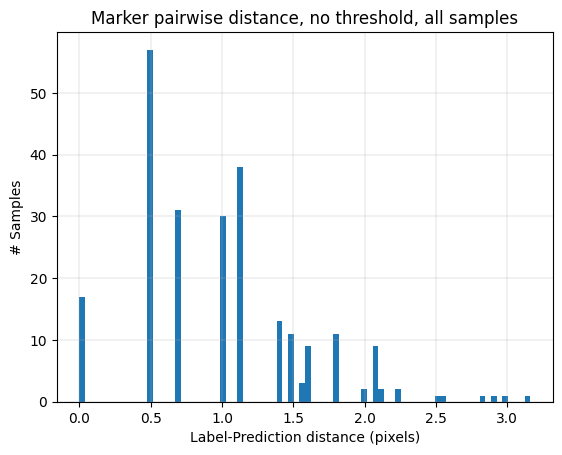

In [ ]:
# Show label-prediction pairwise distance
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
%matplotlib inline

# Convert list of distances to excel file
po = distList_2
# Generate dataframe from list and write to xlsx.
pd.DataFrame(po).to_excel('/content/drive/MyDrive/1429/2D-results/distList-marker-all.xlsx', header=False, index=False)

# Plot the list for all test samples
plt.hist(distList_2, density=False, bins=80)  # density=False would make counts
plt.title('Marker pairwise distance, no threshold, all samples')
plt.ylabel('# Samples')
plt.xlabel('Label-Prediction distance (pixels)');
plt.grid(lw=0.25)
plt.show()


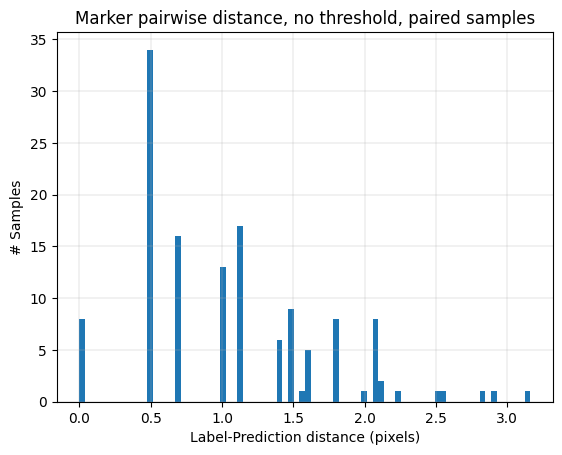

In [ ]:
# Show label-prediction pairwise distance
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
%matplotlib inline

# Convert list of distances to excel file
po = distList_2_2
# Generate dataframe from list and write to xlsx.
pd.DataFrame(po).to_excel('/content/drive/MyDrive/1429/2D-results/distList-marker-LAO90AP.xlsx', header=False, index=False)


# Plot the list for all test samples
plt.hist(distList_2_2, density=False, bins=80)  # density=False would make counts
plt.title('Marker pairwise distance, no threshold, paired samples')
plt.ylabel('# Samples')
plt.xlabel('Label-Prediction distance (pixels)');
plt.grid(lw=0.25)
plt.show()


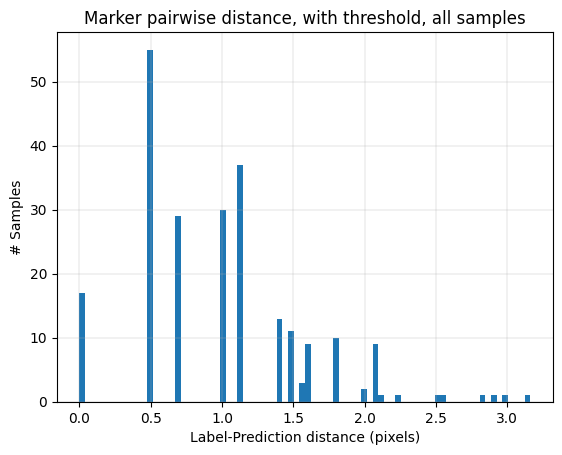

In [ ]:
# Show label-prediction pairwise distance
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
%matplotlib inline

# Convert list of distances to excel file
po = distList_3_2
# Generate dataframe from list and write to xlsx.
pd.DataFrame(po).to_excel('/content/drive/MyDrive/1429/2D-results/distList-marker-all-thresh.xlsx', header=False, index=False)

# Plot the list for all test samples
plt.hist(distList_3_2, density=False, bins=80)  # density=False would make counts
plt.title('Marker pairwise distance, with threshold, all samples')
plt.ylabel('# Samples')
plt.xlabel('Label-Prediction distance (pixels)');
plt.grid(lw=0.25)
plt.show()


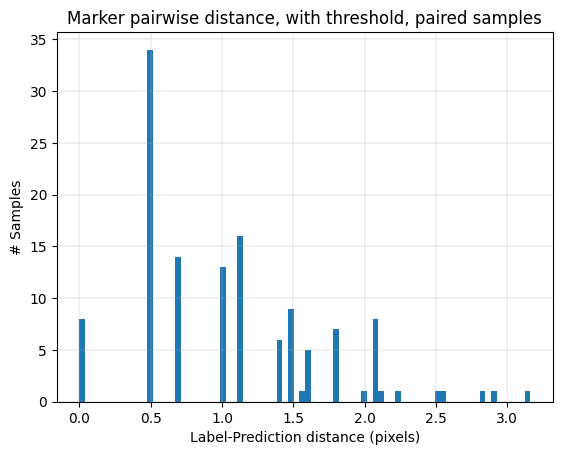

In [ ]:
# Show label-prediction pairwise distance
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
%matplotlib inline

# Convert list of distances to excel file
po = distList_4_2
# Generate dataframe from list and write to xlsx.
pd.DataFrame(po).to_excel('/content/drive/MyDrive/1429/2D-results/distList-marker-LAO90AP-thresh.xlsx', header=False, index=False)


# Plot the list for all test samples
plt.hist(distList_4_2, density=False, bins=80)  # density=False would make counts
plt.title('Marker pairwise distance, with threshold, paired samples')
plt.ylabel('# Samples')
plt.xlabel('Label-Prediction distance (pixels)');
plt.grid(lw=0.25)
plt.show()


### **Save all fields in excel for 3D prediction**

In [ ]:
import os
print ("Current working directory:")
print (os.getcwd())

Current working directory:
/content


In [ ]:
# # We will not need this part as all samples are not paired

# from pandas import DataFrame
# l1 = ls_pred_2_x
# l2 = ls_pred_2_y
# l3 = ls_lbl_2_x
# l4 = ls_lbl_2_y
# l5 = path_k_2

# print(l5)
# # What the 3D prediction function requires: 'x_ID', 'y_ID', 'Px_ID', 'Py_ID', 'model1Pred', 'image_folder_path', 'img_group_name'
# df = DataFrame({'x_ID': l3, 'y_ID': l4, 'Px_ID': l1, 'Py_ID': l2, 'image_folder_path':l5})
# # Save to a path
# df.to_excel('/content/drive/MyDrive/1429/2D-results/output-1429-marker-all.xlsx')
# # Print the excel file
# df

In [ ]:
from pandas import DataFrame
l1 = ls_pred_2_2_x
l2 = ls_pred_2_2_y
l3 = ls_lbl_2_2_x
l4 = ls_lbl_2_2_y
l5 = path_k_2_2

print(l5)
# What the 3D prediction function requires: 'x_ID', 'y_ID', 'Px_ID', 'Py_ID', 'model1Pred', 'image_folder_path', 'img_group_name'
df = DataFrame({'x_ID': l3, 'y_ID': l4, 'Px_ID': l1, 'Py_ID': l2, 'imgID':l5})
# Save to a path
df.to_excel('/content/drive/MyDrive/1429/2D-results/output-1429-marker.xlsx')
# Print the excel file
df

['AP-10003.txt', 'AP-10004.txt', 'AP-10016.txt', 'AP-10028.txt', 'AP-10030.txt', 'AP-10046.txt', 'AP-10061.txt', 'AP-10064.txt', 'AP-10066.txt', 'AP-10089.txt', 'AP-10100.txt', 'AP-10118.txt', 'AP-10127.txt', 'AP-10131.txt', 'AP-20008.txt', 'AP-20011.txt', 'AP-20013.txt', 'AP-20020.txt', 'AP-20021.txt', 'AP-20028.txt', 'AP-20029.txt', 'AP-20036.txt', 'AP-20038.txt', 'AP-20063.txt', 'AP-20067.txt', 'AP-20072.txt', 'AP-20073.txt', 'AP-20078.txt', 'AP-20094.txt', 'AP-20095.txt', 'AP-20106.txt', 'AP-20110.txt', 'AP-20119.txt', 'AP-20120.txt', 'AP-20123.txt', 'AP-20133.txt', 'AP-20135.txt', 'AP-20138.txt', 'AP-20140.txt', 'AP-20141.txt', 'AP-20145.txt', 'AP-20148.txt', 'AP-30017.txt', 'AP-30043.txt', 'AP-30049.txt', 'AP-30054.txt', 'AP-30057.txt', 'AP-30059.txt', 'AP-30074.txt', 'AP-30076.txt', 'AP-30078.txt', 'AP-30081.txt', 'AP-30082.txt', 'AP-30084.txt', 'AP-30087.txt', 'AP-30096.txt', 'AP-30098.txt', 'AP-30103.txt', 'AP-30106.txt', 'AP-30115.txt', 'AP-30120.txt', 'AP-30121.txt', 'AP-301

,x_ID,y_ID,Px_ID,Py_ID,imgID
0,505.5,386.0,505.50016,386.49984,AP-10003.txt
1,514.0,413.5,513.50016,412.99968,AP-10004.txt
2,505.0,447.5,502.99968,448.00000,AP-10016.txt
3,472.5,461.5,470.99968,460.49984,AP-10028.txt
4,462.0,463.5,462.00000,462.99968,AP-10030.txt
...,...,...,...,...,...
129,364.5,409.5,362.99968,408.00000,LAO90-30131.txt
130,372.5,402.0,372.00000,402.49984,LAO90-30132.txt
131,491.0,452.5,490.49984,450.49984,LAO90-30136.txt
132,542.0,459.5,542.49984,460.49984,LAO90-30144.txt


#### **NOTE: Use this only and only if you want to save the distances for samples with a specific confidence threshold**

In [ ]:
# # We will not need this part as all samples are not paired

# from pandas import DataFrame
# l1 = ls_pred_3_2_x
# l2 = ls_pred_3_2_y
# l3 = ls_lbl_3_2_x
# l4 = ls_lbl_3_2_y
# l5 = path_k_3_2

# print(l5)
# # What the 3D prediction function requires: 'x_ID', 'y_ID', 'Px_ID', 'Py_ID', 'model1Pred', 'image_folder_path', 'img_group_name'
# df = DataFrame({'x_ID': l3, 'y_ID': l4, 'Px_ID': l1, 'Py_ID': l2, 'image_folder_path':l5})
# # Save to a path
# df.to_excel('/content/drive/MyDrive/1429/2D-results/output-1429-marker-all-thresh.xlsx')
# # Print the excel file
# df

In [ ]:
from pandas import DataFrame
l1 = ls_pred_4_2_x
l2 = ls_pred_4_2_y
l3 = ls_lbl_4_2_x
l4 = ls_lbl_4_2_y
l5 = path_k_4_2

print(l5)
# What the 3D prediction function requires: 'x_ID', 'y_ID', 'Px_ID', 'Py_ID', 'model1Pred', 'image_folder_path', 'img_group_name'
df = DataFrame({'x_ID': l3, 'y_ID': l4, 'Px_ID': l1, 'Py_ID': l2, 'imgID':l5})
# Save to a path
df.to_excel('/content/drive/MyDrive/1429/2D-results/output-1429-marker-thresh.xlsx')
# Print the excel file
df

['AP-10003.txt', 'AP-10004.txt', 'AP-10016.txt', 'AP-10028.txt', 'AP-10030.txt', 'AP-10046.txt', 'AP-10061.txt', 'AP-10064.txt', 'AP-10066.txt', 'AP-10089.txt', 'AP-10100.txt', 'AP-10118.txt', 'AP-10127.txt', 'AP-10131.txt', 'AP-20008.txt', 'AP-20011.txt', 'AP-20020.txt', 'AP-20021.txt', 'AP-20028.txt', 'AP-20029.txt', 'AP-20036.txt', 'AP-20038.txt', 'AP-20063.txt', 'AP-20067.txt', 'AP-20072.txt', 'AP-20073.txt', 'AP-20078.txt', 'AP-20094.txt', 'AP-20095.txt', 'AP-20106.txt', 'AP-20110.txt', 'AP-20119.txt', 'AP-20120.txt', 'AP-20123.txt', 'AP-20133.txt', 'AP-20135.txt', 'AP-20138.txt', 'AP-20140.txt', 'AP-20141.txt', 'AP-20145.txt', 'AP-20148.txt', 'AP-30017.txt', 'AP-30043.txt', 'AP-30049.txt', 'AP-30054.txt', 'AP-30057.txt', 'AP-30059.txt', 'AP-30074.txt', 'AP-30076.txt', 'AP-30078.txt', 'AP-30081.txt', 'AP-30082.txt', 'AP-30084.txt', 'AP-30087.txt', 'AP-30096.txt', 'AP-30098.txt', 'AP-30103.txt', 'AP-30106.txt', 'AP-30115.txt', 'AP-30120.txt', 'AP-30121.txt', 'AP-30131.txt', 'AP-301

,x_ID,y_ID,Px_ID,Py_ID,imgID
0,505.5,386.0,505.50016,386.49984,AP-10003.txt
1,514.0,413.5,513.50016,412.99968,AP-10004.txt
2,505.0,447.5,502.99968,448.00000,AP-10016.txt
3,472.5,461.5,470.99968,460.49984,AP-10028.txt
4,462.0,463.5,462.00000,462.99968,AP-10030.txt
...,...,...,...,...,...
124,447.0,322.0,446.49984,322.99968,LAO90-30120.txt
125,438.5,303.0,438.49984,303.50016,LAO90-30121.txt
126,491.0,452.5,490.49984,450.49984,LAO90-30136.txt
127,542.0,459.5,542.49984,460.49984,LAO90-30144.txt


## **TIP PREDICTION**

### **Calculate the distance between prediction & GT**

In [ ]:
# Extract label and prediction from respective dictionary and find pairwise distance
import numpy as np

def calc_distance_t(lbl, prd):
  dist_list_3 = []
  k_ls_3 = []
  prd_cx_3_ls = []
  prd_cy_3_ls = []
  lbl_cx_3_ls = []
  lbl_cy_3_ls = []

  for k in prd:
    prd_cx_3 = prd[k]['3']['xx']*614
    prd_cy_3 = prd[k]['3']['yy']*614
    lbl_cx_3 = lbl[k]['cx_3']*614
    lbl_cy_3 = lbl[k]['cy_3']*614

    # Store predictions and labels in lists
    k_ls_3.append(k)
    prd_cx_3_ls.append(prd_cx_3)
    prd_cy_3_ls.append(prd_cy_3)
    lbl_cx_3_ls.append(lbl_cx_3)
    lbl_cy_3_ls.append(lbl_cy_3)


    dist_3 = np.power((np.power((prd_cx_3-lbl_cx_3),2) + np.power((prd_cy_3-lbl_cy_3),2)),0.5)
    # print(dist_3)
    dist_list_3.append(dist_3)
    # print(k, dist_list_3)
  return dist_list_3,prd_cx_3_ls,prd_cy_3_ls,lbl_cx_3_ls,lbl_cy_3_ls, k_ls_3

In [ ]:
# Distance for label vs prediction all samples + no conf. threshold
distList_3, ls_pred_3_x, ls_pred_3_y, ls_lbl_3_x, ls_lbl_3_y, path_k_3 = calc_distance_t(lbl,pred)

In [ ]:
# Distance for label vs prediction LAO90/AP samples + no conf. threshold
distList_2_3,ls_pred_2_3_x, ls_pred_2_3_y, ls_lbl_2_3_x, ls_lbl_2_3_y, path_k_2_3 = calc_distance_t(lbl,pred2)

In [ ]:
# Distance for label vs prediction all samples + conf. threshold
distList_3_3,ls_pred_3_3_x, ls_pred_3_3_y, ls_lbl_3_3_x, ls_lbl_3_3_y, path_k_3_3 = calc_distance_t(lbl,pred3_3)

In [ ]:
# Distance for label vs prediction LAO90/AP samples + conf. threshold
distList_4_3,ls_pred_4_3_x, ls_pred_4_3_y, ls_lbl_4_3_x, ls_lbl_4_3_y, path_k_4_3 = calc_distance_t(lbl,pred4_3)

In [ ]:
print(distList_3)
print(len(distList_3), '\n')
print(distList_2_3)
print(len(distList_2_3), '\n')
print(distList_3_3)
print(len(distList_3_3), '\n')
print(distList_4_3)
print(len(distList_4_3))

[0.7069936531539771, 1.118033988749895, 0.9998400000000061, 1.1181055520835204, 0.7071068173904138, 2.0615916243524133, 1.580987041566128, 1.5810882733105178, 0.7068805070165765, 1.1178193628668482, 1.1181770993898899, 0.49984000000000606, 2.061785664903111, 0.49968002561640595, 0.7069936531540173, 6.18454202437012, 2.50000000512, 1.581543614574104, 1.5810882733105087, 1.5809364475525243, 1.1181770993899027, 0.7068805432319915, 1.5809364475525514, 7.4331850525598995, 6.5, 1.1181771795203066, 2.061514012952618, 0.49984000000000606, 0.5000001023999896, 0.5001599999999371, 1.8029265172557578, 1.0, 1.5809364475524883, 1.1181771795203066, 1.414552978152429, 2.9154210761398254, 1.1183202260532938, 0.7069937255732939, 0.7068805432320316, 1.5812400359211716, 2.4996800051206676, 1.1177477926616648, 1.1181771795202813, 3.807676463566703, 0.7071068173903334, 2.236139541978615, 2.121207233628965, 1.581037666344484, 2.1213203556275984, 0.7068805070165765, 1.500159999999994, 1.1176762178734576, 0.00

### **Present results for tip**

In [ ]:
# Find mean and standard deviation of the pairwise distance all samples + no conf. threshold
print(np.mean(distList_3))
print(np.std(distList_3))
print(np.max(distList_3))

1.3787258843061045
1.0523099685503432
7.4331850525598995


In [ ]:
# Find mean and standard deviation of the pairwise distance LAO90/AP samples + no conf. threshold
print(np.mean(distList_2_3))
print(np.std(distList_2_3))
print(np.max(distList_2_3))

1.2210997382012365
0.8450238748569749
5.220398464485245


In [ ]:
# Find mean and standard deviation of the pairwise distance LAO90/AP samples + conf. threshold
print(np.mean(distList_3_3))
print(np.std(distList_3_3))
print(np.max(distList_3_3))

1.2775319001705228
0.8155567330495633
5.220398464485245


In [ ]:
# Find mean and standard deviation of the pairwise distance LAO90/AP samples + conf. threshold
print(np.mean(distList_4_3))
print(np.std(distList_4_3))
print(np.max(distList_4_3))

1.2079297488463947
0.8332854784705115
5.220398464485245


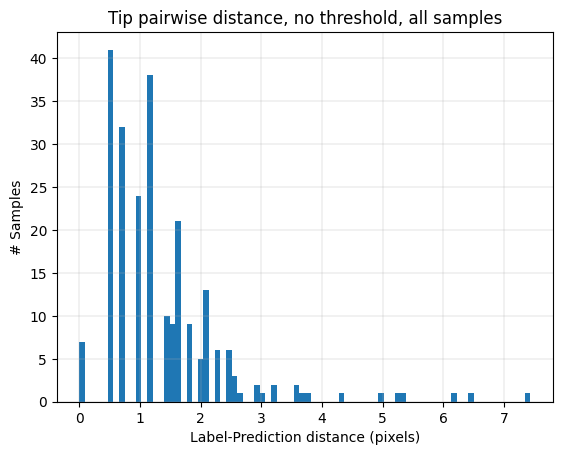

In [ ]:
# Show label-prediction pairwise distance
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
%matplotlib inline

# Convert list of distances to excel file
po = distList_3
# Generate dataframe from list and write to xlsx.
pd.DataFrame(po).to_excel('/content/drive/MyDrive/1429/2D-results/distList-tip-all.xlsx', header=False, index=False)

# Plot the list for all test samples
plt.hist(distList_3, density=False, bins=80)  # density=False would make counts
plt.title('Tip pairwise distance, no threshold, all samples')
plt.ylabel('# Samples')
plt.xlabel('Label-Prediction distance (pixels)');
plt.grid(lw=0.25)
plt.show()


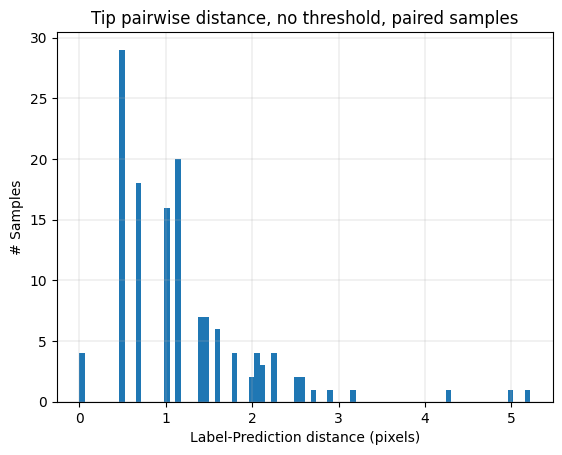

In [ ]:
# Show label-prediction pairwise distance
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
%matplotlib inline

# Convert list of distances to excel file
po = distList_2_3
# Generate dataframe from list and write to xlsx.
pd.DataFrame(po).to_excel('/content/drive/MyDrive/1429/2D-results/distList-tip-LAO90AP.xlsx', header=False, index=False)


# Plot the list for all test samples
plt.hist(distList_2_3, density=False, bins=80)  # density=False would make counts
plt.title('Tip pairwise distance, no threshold, paired samples')
plt.ylabel('# Samples')
plt.xlabel('Label-Prediction distance (pixels)');
plt.grid(lw=0.25)
plt.show()


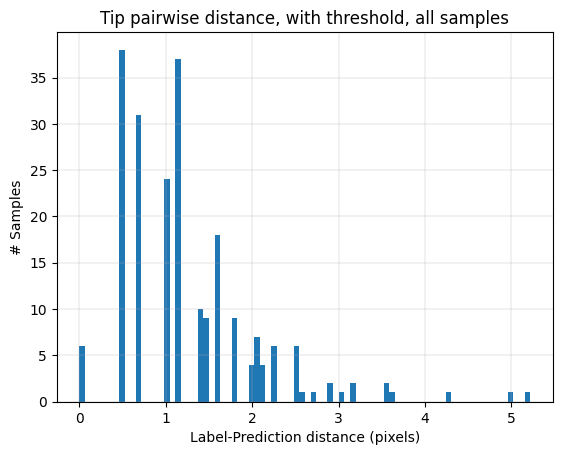

In [ ]:
# Show label-prediction pairwise distance
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
%matplotlib inline

# Convert list of distances to excel file
po = distList_3_3
# Generate dataframe from list and write to xlsx.
pd.DataFrame(po).to_excel('/content/drive/MyDrive/1429/2D-results/distList-tip-all-thresh.xlsx', header=False, index=False)

# Plot the list for all test samples
plt.hist(distList_3_3, density=False, bins=80)  # density=False would make counts
plt.title('Tip pairwise distance, with threshold, all samples')
plt.ylabel('# Samples')
plt.xlabel('Label-Prediction distance (pixels)');
plt.grid(lw=0.25)
plt.show()


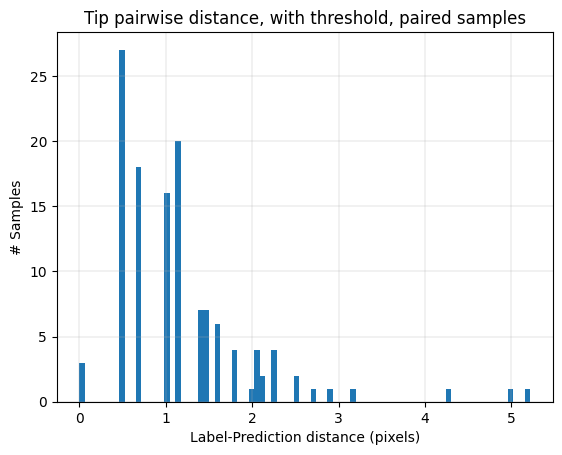

In [ ]:
# Show label-prediction pairwise distance
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
%matplotlib inline

# Convert list of distances to excel file
po = distList_4_3
# Generate dataframe from list and write to xlsx.
pd.DataFrame(po).to_excel('/content/drive/MyDrive/1429/2D-results/distList-tip-LAO90AP-thresh.xlsx', header=False, index=False)


# Plot the list for all test samples
plt.hist(distList_4_3, density=False, bins=80)  # density=False would make counts
plt.title('Tip pairwise distance, with threshold, paired samples')
plt.ylabel('# Samples')
plt.xlabel('Label-Prediction distance (pixels)');
plt.grid(lw=0.25)
plt.show()


### **Save all fields in excel for 3D prediction**

In [ ]:
import os
print ("Current working directory:")
print (os.getcwd())

Current working directory:
/content


In [ ]:
# # We will not need this part as all samples are not paired

# from pandas import DataFrame
# l1 = ls_pred_3_x
# l2 = ls_pred_3_y
# l3 = ls_lbl_3_x
# l4 = ls_lbl_3_y
# l5 = path_k_3

# print(l5)
# # What the 3D prediction function requires: 'x_ID', 'y_ID', 'Px_ID', 'Py_ID', 'model1Pred', 'image_folder_path', 'img_group_name'
# df = DataFrame({'x_ID': l3, 'y_ID': l4, 'Px_ID': l1, 'Py_ID': l2, 'imgID':l5})
# # Save to a path
# df.to_excel('/content/drive/MyDrive/1429/2D-results/output-1429-tip-all.xlsx')
# # Print the excel file
# df

In [ ]:
from pandas import DataFrame
l1 = ls_pred_2_3_x
l2 = ls_pred_2_3_y
l3 = ls_lbl_2_3_x
l4 = ls_lbl_2_3_y
l5 = path_k_2_3

print(l5)
# What the 3D prediction function requires: 'x_ID', 'y_ID', 'Px_ID', 'Py_ID', 'model1Pred', 'image_folder_path', 'img_group_name'
df = DataFrame({'x_ID': l3, 'y_ID': l4, 'Px_ID': l1, 'Py_ID': l2, 'imgID':l5})
# Save to a path
df.to_excel('/content/drive/MyDrive/1429/2D-results/output-1429-tip.xlsx')
# Print the excel file
df

['AP-10003.txt', 'AP-10004.txt', 'AP-10016.txt', 'AP-10028.txt', 'AP-10030.txt', 'AP-10046.txt', 'AP-10061.txt', 'AP-10064.txt', 'AP-10066.txt', 'AP-10089.txt', 'AP-10100.txt', 'AP-10118.txt', 'AP-10127.txt', 'AP-10131.txt', 'AP-20008.txt', 'AP-20011.txt', 'AP-20013.txt', 'AP-20020.txt', 'AP-20021.txt', 'AP-20028.txt', 'AP-20029.txt', 'AP-20036.txt', 'AP-20038.txt', 'AP-20063.txt', 'AP-20067.txt', 'AP-20072.txt', 'AP-20073.txt', 'AP-20078.txt', 'AP-20094.txt', 'AP-20095.txt', 'AP-20106.txt', 'AP-20110.txt', 'AP-20119.txt', 'AP-20120.txt', 'AP-20123.txt', 'AP-20133.txt', 'AP-20135.txt', 'AP-20138.txt', 'AP-20140.txt', 'AP-20141.txt', 'AP-20145.txt', 'AP-20148.txt', 'AP-30017.txt', 'AP-30043.txt', 'AP-30049.txt', 'AP-30054.txt', 'AP-30057.txt', 'AP-30059.txt', 'AP-30074.txt', 'AP-30076.txt', 'AP-30078.txt', 'AP-30081.txt', 'AP-30082.txt', 'AP-30084.txt', 'AP-30087.txt', 'AP-30096.txt', 'AP-30098.txt', 'AP-30103.txt', 'AP-30106.txt', 'AP-30115.txt', 'AP-30120.txt', 'AP-30121.txt', 'AP-301

,x_ID,y_ID,Px_ID,Py_ID,imgID
0,527.5,383.5,527.00032,382.99968,AP-10003.txt
1,536.0,416.5,536.00000,415.00032,AP-10004.txt
2,523.5,457.0,523.50016,458.00000,AP-10016.txt
3,485.0,473.5,484.99968,473.50016,AP-10028.txt
4,474.0,474.0,475.50016,476.49984,AP-10030.txt
...,...,...,...,...,...
129,361.5,414.0,360.00000,414.00000,LAO90-30131.txt
130,369.5,407.5,369.00032,407.50016,LAO90-30132.txt
131,505.5,470.5,504.49984,467.50016,LAO90-30136.txt
132,559.5,478.5,560.49984,478.49984,LAO90-30144.txt


#### **NOTE: Use this only and only if you want to save the distances for samples with a specific confidence threshold**

In [ ]:
# # We will not need this part as all samples are not paired

# from pandas import DataFrame
# l1 = ls_pred_3_3_x
# l2 = ls_pred_3_3_y
# l3 = ls_lbl_3_3_x
# l4 = ls_lbl_3_3_y
# l5 = path_k_3_3

# print(l5)
# # What the 3D prediction function requires: 'x_ID', 'y_ID', 'Px_ID', 'Py_ID', 'model1Pred', 'image_folder_path', 'img_group_name'
# df = DataFrame({'x_ID': l3, 'y_ID': l4, 'Px_ID': l1, 'Py_ID': l2, 'imgID':l5})
# # Save to a path
# df.to_excel('/content/drive/MyDrive/1429/2D-results/output-1429-marker-tip-thresh.xlsx')
# # Print the excel file
# df

In [ ]:
from pandas import DataFrame
l1 = ls_pred_4_3_x
l2 = ls_pred_4_3_y
l3 = ls_lbl_4_3_x
l4 = ls_lbl_4_3_y
l5 = path_k_4_3

print(l5)
# What the 3D prediction function requires: 'x_ID', 'y_ID', 'Px_ID', 'Py_ID', 'model1Pred', 'image_folder_path', 'img_group_name'
df = DataFrame({'x_ID': l3, 'y_ID': l4, 'Px_ID': l1, 'Py_ID': l2, 'imgID':l5})
# Save to a path
df.to_excel('/content/drive/MyDrive/1429/2D-results/output-1429-tip-thresh.xlsx')
# Print the excel file
df

['AP-10003.txt', 'AP-10004.txt', 'AP-10016.txt', 'AP-10028.txt', 'AP-10030.txt', 'AP-10046.txt', 'AP-10061.txt', 'AP-10064.txt', 'AP-10066.txt', 'AP-10089.txt', 'AP-10100.txt', 'AP-10118.txt', 'AP-10127.txt', 'AP-10131.txt', 'AP-20008.txt', 'AP-20011.txt', 'AP-20020.txt', 'AP-20021.txt', 'AP-20028.txt', 'AP-20029.txt', 'AP-20036.txt', 'AP-20038.txt', 'AP-20063.txt', 'AP-20067.txt', 'AP-20072.txt', 'AP-20073.txt', 'AP-20078.txt', 'AP-20094.txt', 'AP-20095.txt', 'AP-20106.txt', 'AP-20110.txt', 'AP-20119.txt', 'AP-20120.txt', 'AP-20123.txt', 'AP-20133.txt', 'AP-20135.txt', 'AP-20138.txt', 'AP-20141.txt', 'AP-20145.txt', 'AP-20148.txt', 'AP-30017.txt', 'AP-30043.txt', 'AP-30049.txt', 'AP-30054.txt', 'AP-30057.txt', 'AP-30059.txt', 'AP-30074.txt', 'AP-30076.txt', 'AP-30078.txt', 'AP-30081.txt', 'AP-30082.txt', 'AP-30084.txt', 'AP-30087.txt', 'AP-30096.txt', 'AP-30098.txt', 'AP-30103.txt', 'AP-30106.txt', 'AP-30115.txt', 'AP-30120.txt', 'AP-30121.txt', 'AP-30131.txt', 'AP-30132.txt', 'AP-301

,x_ID,y_ID,Px_ID,Py_ID,imgID
0,527.5,383.5,527.00032,382.99968,AP-10003.txt
1,536.0,416.5,536.00000,415.00032,AP-10004.txt
2,523.5,457.0,523.50016,458.00000,AP-10016.txt
3,485.0,473.5,484.99968,473.50016,AP-10028.txt
4,474.0,474.0,475.50016,476.49984,AP-10030.txt
...,...,...,...,...,...
122,447.5,284.0,447.50016,284.99968,LAO90-30121.txt
123,361.5,414.0,360.00000,414.00000,LAO90-30131.txt
124,505.5,470.5,504.49984,467.50016,LAO90-30136.txt
125,559.5,478.5,560.49984,478.49984,LAO90-30144.txt


## **ENTRY PREDICTION**

### **Calculate the distance between prediction & GT**

In [ ]:
# Extract label and prediction from respective dictionary and find pairwise distance
import numpy as np

def calc_distance_e(lbl, prd):
  dist_list_1 = []
  k_ls_1 = []
  prd_cx_1_ls = []
  prd_cy_1_ls = []
  lbl_cx_1_ls = []
  lbl_cy_1_ls = []

  for k in prd:
    prd_cx_1 = prd[k]['1']['xx']*614
    prd_cy_1 = prd[k]['1']['yy']*614
    lbl_cx_1 = lbl[k]['cx_1']*614
    lbl_cy_1 = lbl[k]['cy_1']*614

    # Store predictions and labels in lists
    k_ls_1.append(k)
    prd_cx_1_ls.append(prd_cx_1)
    prd_cy_1_ls.append(prd_cy_1)
    lbl_cx_1_ls.append(lbl_cx_1)
    lbl_cy_1_ls.append(lbl_cy_1)


    dist_1 = np.power((np.power((prd_cx_1-lbl_cx_1),2) + np.power((prd_cy_1-lbl_cy_1),2)),0.5)
    dist_list_1.append(dist_1)
  # print(k, dist_list)
  return dist_list_1,prd_cx_1_ls,prd_cy_1_ls,lbl_cx_1_ls,lbl_cy_1_ls, k_ls_1

In [ ]:
# Distance for label vs prediction all samples + no conf. threshold
distList_1, ls_pred_1_x, ls_pred_1_y, ls_lbl_1_x, ls_lbl_1_y, path_k_1 = calc_distance_e(lbl,pred)

In [ ]:
# Distance for label vs prediction LAO90/AP samples + no conf. threshold
distList_2_1,ls_pred_2_1_x, ls_pred_2_1_y, ls_lbl_2_1_x, ls_lbl_2_1_y, path_k_2_1 = calc_distance_e(lbl,pred2)

In [ ]:
# Distance for label vs prediction all samples + conf. threshold
distList_3_1,ls_pred_3_1_x, ls_pred_3_1_y, ls_lbl_3_1_x, ls_lbl_3_1_y, path_k_3_1 = calc_distance_e(lbl,pred3_1)

In [ ]:
# Distance for label vs prediction LAO90/AP samples + conf. threshold
distList_4_1,ls_pred_4_1_x, ls_pred_4_1_y, ls_lbl_4_1_x, ls_lbl_4_1_y, path_k_4_1 = calc_distance_e(lbl,pred4_1)

In [ ]:
print(distList_1)
print(len(distList_1), '\n')
print(distList_2_1)
print(len(distList_2_1), '\n')
print(distList_3_1)
print(len(distList_3_1), '\n')
print(distList_4_1)
print(len(distList_4_1))

[1.581037666344484, 1.1181055635315065, 1.5810882409277498, 0.7068805432320316, 0.7074462014881285, 1.000159999999937, 1.1179624437341382, 1.4141004298139148, 2.235924870294175, 0.00032000000001630724, 1.0, 1.1181771337314979, 0.00031999999998788553, 2.549541140205428, 1.5813918325323328, 1.00032001279595, 0.49984002560825685, 0.00031999999998788553, 2.1214334836614763, 1.5810882409277318, 0.4998400256081716, 0.7068805432320316, 1.11810556353143, 1.1183202146075943, 0.4998401024327172, 0.7067673789869041, 3.3542450868116305, 1.4141004298139952, 2.1216597578311456, 0.49984000000000606, 1.1178909170397675, 0.7069936531539369, 1.5808352546676192, 1.4996800085351094, 0.7072199273210921, 1.1179624437341127, 3.041223442234999, 0.9998400512081412, 0.707106817390454, 2.061358787596175, 1.8025537581997149, 0.7068805070165362, 0.500160102367226, 1.5001600085324172, 0.5001600255918608, 1.5809870415660743, 1.00032001279595, 1.1178193285141855, 1.1179624551834626, 0.7068805070165362, 0.500000025599

### **Present results for entry**

In [ ]:
# Find mean and standard deviation of the pairwise distance all samples + no conf. threshold
print(np.mean(distList_1))
print(np.std(distList_1))
print(np.max(distList_1))

48.90579232168648
168.405009869999
651.0625582231139


In [ ]:
# Find mean and standard deviation of the pairwise distance LAO90/AP samples + no conf. threshold
print(np.mean(distList_2_1))
print(np.std(distList_2_1))
print(np.max(distList_2_1))

87.03817846575195
218.47350141552096
651.0625582231139


In [ ]:
# Find mean and standard deviation of the pairwise distance LAO90/AP samples + conf. threshold
print(np.mean(distList_3_1))
print(np.std(distList_3_1))
print(np.max(distList_3_1))

1.0627133813435246
0.5781830177380559
3.3542450868116305


In [ ]:
# Find mean and standard deviation of the pairwise distance LAO90/AP samples + conf. threshold
print(np.mean(distList_4_1))
print(np.std(distList_4_1))
print(np.max(distList_4_1))

0.978910697167234
0.4434515711422843
1.8031306464035926


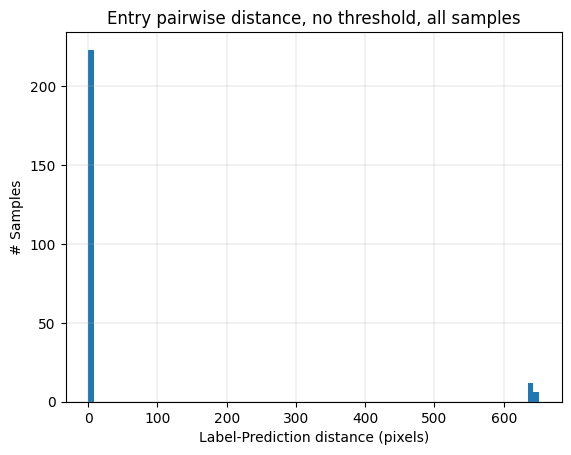

In [ ]:
# Show label-prediction pairwise distance
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
%matplotlib inline

# Convert list of distances to excel file
po = distList_1
# Generate dataframe from list and write to xlsx.
pd.DataFrame(po).to_excel('/content/drive/MyDrive/1429/2D-results/distList-entry-all.xlsx', header=False, index=False)

# Plot the list for all test samples
plt.hist(distList_1, density=False, bins=80)  # density=False would make counts
plt.title('Entry pairwise distance, no threshold, all samples')
plt.ylabel('# Samples')
plt.xlabel('Label-Prediction distance (pixels)');
plt.grid(lw=0.25)
plt.show()


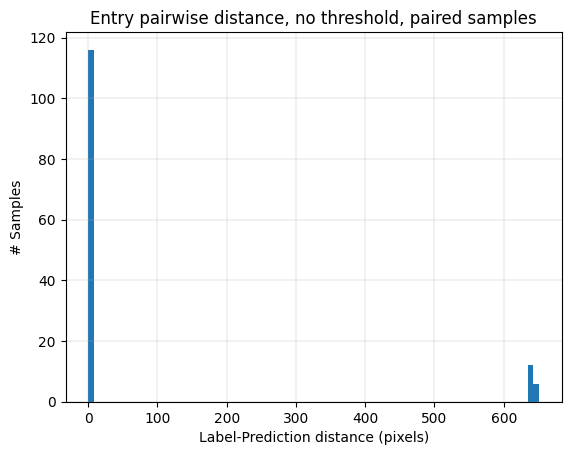

In [ ]:
# Show label-prediction pairwise distance
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
%matplotlib inline

# Convert list of distances to excel file
po = distList_2_1
# Generate dataframe from list and write to xlsx.
pd.DataFrame(po).to_excel('/content/drive/MyDrive/1429/2D-results/distList-entry-LAO90AP.xlsx', header=False, index=False)


# Plot the list for all test samples
plt.hist(distList_2_1, density=False, bins=80)  # density=False would make counts
plt.title('Entry pairwise distance, no threshold, paired samples')
plt.ylabel('# Samples')
plt.xlabel('Label-Prediction distance (pixels)');
plt.grid(lw=0.25)
plt.show()


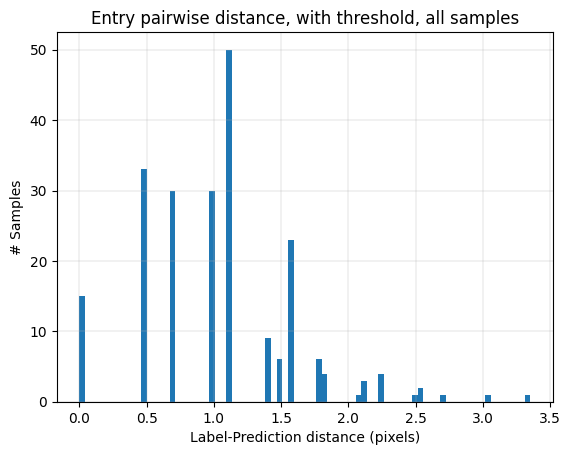

In [ ]:
# Show label-prediction pairwise distance
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
%matplotlib inline

# Convert list of distances to excel file
po = distList_3_1
# Generate dataframe from list and write to xlsx.
pd.DataFrame(po).to_excel('/content/drive/MyDrive/1429/2D-results/distList-entry-all-thresh.xlsx', header=False, index=False)

# Plot the list for all test samples
plt.hist(distList_3_1, density=False, bins=80)  # density=False would make counts
plt.title('Entry pairwise distance, with threshold, all samples')
plt.ylabel('# Samples')
plt.xlabel('Label-Prediction distance (pixels)');
plt.grid(lw=0.25)
plt.show()


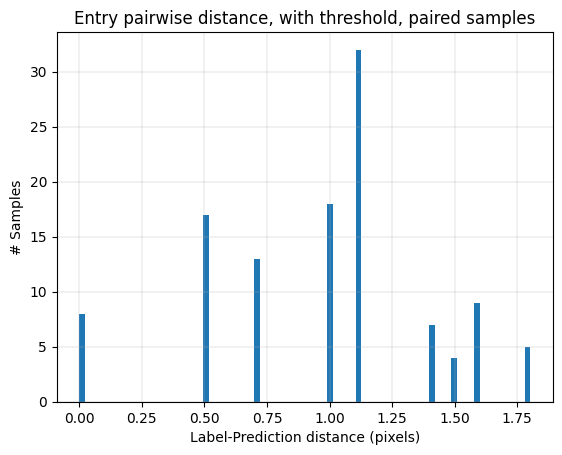

In [ ]:
# Show label-prediction pairwise distance
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
%matplotlib inline

# Convert list of distances to excel file
po = distList_4_1
# Generate dataframe from list and write to xlsx.
pd.DataFrame(po).to_excel('/content/drive/MyDrive/1429/2D-results/distList-entry-LAO90AP-thresh.xlsx', header=False, index=False)


# Plot the list for all test samples
plt.hist(distList_4_1, density=False, bins=80)  # density=False would make counts
plt.title('Entry pairwise distance, with threshold, paired samples')
plt.ylabel('# Samples')
plt.xlabel('Label-Prediction distance (pixels)');
plt.grid(lw=0.25)
plt.show()


### **Save all fields in excel for 3D prediction**

In [ ]:
import os
print ("Current working directory:")
print (os.getcwd())

Current working directory:
/content


In [ ]:
# # We will not need this part as all samples are not paired

# from pandas import DataFrame
# l1 = ls_pred_1_x
# l2 = ls_pred_1_y
# l3 = ls_lbl_1_x
# l4 = ls_lbl_1_y
# l5 = path_k_1

# print(l5)
# # What the 3D prediction function requires: 'x_ID', 'y_ID', 'Px_ID', 'Py_ID', 'model1Pred', 'image_folder_path', 'img_group_name'
# df = DataFrame({'x_ID': l3, 'y_ID': l4, 'Px_ID': l1, 'Py_ID': l2, 'imgID':l5})
# # Save to a path
# df.to_excel('/content/drive/MyDrive/1429/2D-results/output-1429-entry-all.xlsx')
# # Print the excel file
# df

In [ ]:
from pandas import DataFrame
l1 = ls_pred_2_1_x
l2 = ls_pred_2_1_y
l3 = ls_lbl_2_1_x
l4 = ls_lbl_2_1_y
l5 = path_k_2_1

print(l5)
# What the 3D prediction function requires: 'x_ID', 'y_ID', 'Px_ID', 'Py_ID', 'model1Pred', 'image_folder_path', 'img_group_name'
df = DataFrame({'x_ID': l3, 'y_ID': l4, 'Px_ID': l1, 'Py_ID': l2, 'imgID':l5})
# Save to a path
df.to_excel('/content/drive/MyDrive/1429/2D-results/output-1429-entry.xlsx')
# Print the excel file
df

['AP-10003.txt', 'AP-10004.txt', 'AP-10016.txt', 'AP-10028.txt', 'AP-10030.txt', 'AP-10046.txt', 'AP-10061.txt', 'AP-10064.txt', 'AP-10066.txt', 'AP-10089.txt', 'AP-10100.txt', 'AP-10118.txt', 'AP-10127.txt', 'AP-10131.txt', 'AP-20008.txt', 'AP-20011.txt', 'AP-20013.txt', 'AP-20020.txt', 'AP-20021.txt', 'AP-20028.txt', 'AP-20029.txt', 'AP-20036.txt', 'AP-20038.txt', 'AP-20063.txt', 'AP-20067.txt', 'AP-20072.txt', 'AP-20073.txt', 'AP-20078.txt', 'AP-20094.txt', 'AP-20095.txt', 'AP-20106.txt', 'AP-20110.txt', 'AP-20119.txt', 'AP-20120.txt', 'AP-20123.txt', 'AP-20133.txt', 'AP-20135.txt', 'AP-20138.txt', 'AP-20140.txt', 'AP-20141.txt', 'AP-20145.txt', 'AP-20148.txt', 'AP-30017.txt', 'AP-30043.txt', 'AP-30049.txt', 'AP-30054.txt', 'AP-30057.txt', 'AP-30059.txt', 'AP-30074.txt', 'AP-30076.txt', 'AP-30078.txt', 'AP-30081.txt', 'AP-30082.txt', 'AP-30084.txt', 'AP-30087.txt', 'AP-30096.txt', 'AP-30098.txt', 'AP-30103.txt', 'AP-30106.txt', 'AP-30115.txt', 'AP-30120.txt', 'AP-30121.txt', 'AP-301

,x_ID,y_ID,Px_ID,Py_ID,imgID
0,363.5,638.0,362.99968,638.00000,AP-10003.txt
1,364.0,637.5,364.49984,638.00000,AP-10004.txt
2,365.5,637.5,364.99968,638.00000,AP-10016.txt
3,365.5,637.5,365.50016,638.00000,AP-10028.txt
4,366.5,637.5,365.50016,638.00000,AP-10030.txt
...,...,...,...,...,...
129,388.5,637.5,388.00000,638.00000,LAO90-30131.txt
130,389.5,637.5,388.00000,638.00000,LAO90-30132.txt
131,388.5,637.5,389.50016,638.00000,LAO90-30136.txt
132,393.5,637.5,395.00032,636.49984,LAO90-30144.txt


#### **NOTE: Use this only and only if you want to save the distances for samples with a specific confidence threshold**

In [ ]:
# # We will not need this part as all samples are not paired

# from pandas import DataFrame
# l1 = ls_pred_3_1_x
# l2 = ls_pred_3_1_y
# l3 = ls_lbl_3_1_x
# l4 = ls_lbl_3_1_y
# l5 = path_k_3_1

# print(l5)
# # What the 3D prediction function requires: 'x_ID', 'y_ID', 'Px_ID', 'Py_ID', 'model1Pred', 'image_folder_path', 'img_group_name'
# df = DataFrame({'x_ID': l3, 'y_ID': l4, 'Px_ID': l1, 'Py_ID': l2, 'imgID':l5})
# # Save to a path
# df.to_excel('/content/drive/MyDrive/1429/2D-results/output-1429-entry-all-thresh.xlsx')
# # Print the excel file
# df

In [ ]:
from pandas import DataFrame
l1 = ls_pred_4_1_x
l2 = ls_pred_4_1_y
l3 = ls_lbl_4_1_x
l4 = ls_lbl_4_1_y
l5 = path_k_4_1

print(l5)
# What the 3D prediction function requires: 'x_ID', 'y_ID', 'Px_ID', 'Py_ID', 'model1Pred', 'image_folder_path', 'img_group_name'
df = DataFrame({'x_ID': l3, 'y_ID': l4, 'Px_ID': l1, 'Py_ID': l2, 'imgID':l5})
# Save to a path
df.to_excel('/content/drive/MyDrive/1429/2D-results/output-1429-entry-thresh.xlsx')
# Print the excel file
df

['AP-10003.txt', 'AP-10004.txt', 'AP-10016.txt', 'AP-10028.txt', 'AP-10030.txt', 'AP-10046.txt', 'AP-10061.txt', 'AP-10064.txt', 'AP-10066.txt', 'AP-10089.txt', 'AP-10100.txt', 'AP-10118.txt', 'AP-10127.txt', 'AP-10131.txt', 'AP-20008.txt', 'AP-20011.txt', 'AP-20013.txt', 'AP-20020.txt', 'AP-20021.txt', 'AP-20028.txt', 'AP-20029.txt', 'AP-20036.txt', 'AP-20038.txt', 'AP-20063.txt', 'AP-20067.txt', 'AP-20072.txt', 'AP-20073.txt', 'AP-20078.txt', 'AP-20094.txt', 'AP-20095.txt', 'AP-20106.txt', 'AP-20110.txt', 'AP-20119.txt', 'AP-20120.txt', 'AP-20123.txt', 'AP-20133.txt', 'AP-20135.txt', 'AP-20138.txt', 'AP-20140.txt', 'AP-20141.txt', 'AP-20145.txt', 'AP-20148.txt', 'AP-30017.txt', 'AP-30049.txt', 'AP-30096.txt', 'AP-30098.txt', 'AP-30103.txt', 'AP-30106.txt', 'AP-30115.txt', 'AP-30120.txt', 'AP-30121.txt', 'AP-30131.txt', 'AP-30132.txt', 'AP-30136.txt', 'AP-30144.txt', 'AP-30146.txt', 'LAO90-10003.txt', 'LAO90-10004.txt', 'LAO90-10016.txt', 'LAO90-10028.txt', 'LAO90-10030.txt', 'LAO90-1

,x_ID,y_ID,Px_ID,Py_ID,imgID
0,363.5,638.0,362.99968,638.00000,AP-10003.txt
1,364.0,637.5,364.49984,638.00000,AP-10004.txt
2,365.5,637.5,364.99968,638.00000,AP-10016.txt
3,365.5,637.5,365.50016,638.00000,AP-10028.txt
4,366.5,637.5,365.50016,638.00000,AP-10030.txt
...,...,...,...,...,...
108,388.5,637.5,388.00000,638.00000,LAO90-30131.txt
109,389.5,637.5,388.00000,638.00000,LAO90-30132.txt
110,388.5,637.5,389.50016,638.00000,LAO90-30136.txt
111,393.5,637.5,395.00032,636.49984,LAO90-30144.txt


## **BEND PREDICTION**

### **Calculate the distance between prediction & GT**

In [ ]:
# Extract label and prediction from respective dictionary and find pairwise distance
import numpy as np

def calc_distance_b(lbl, prd):
  dist_list_0 = []
  k_ls_0 = []
  prd_cx_0_ls = []
  prd_cy_0_ls = []
  lbl_cx_0_ls = []
  lbl_cy_0_ls = []

  for k in prd:
    if 'cx_0' in lbl[k] and 'cy_0' in lbl[k]:

      prd_cx_0 = prd[k]['0']['xx']*614
      prd_cy_0 = prd[k]['0']['yy']*614
      lbl_cx_0 = lbl[k]['cx_0']*614
      lbl_cy_0 = lbl[k]['cy_0']*614

      # Store predictions and labels in lists
      k_ls_0.append(k)
      prd_cx_0_ls.append(prd_cx_0)
      prd_cy_0_ls.append(prd_cy_0)
      lbl_cx_0_ls.append(lbl_cx_0)
      lbl_cy_0_ls.append(lbl_cy_0)


      dist_0 = np.power((np.power((prd_cx_0-lbl_cx_0),2) + np.power((prd_cy_0-lbl_cy_0),2)),0.5)
      dist_list_0.append(dist_0)
    # print(k, dist_list)
  return dist_list_0,prd_cx_0_ls,prd_cy_0_ls,lbl_cx_0_ls,lbl_cy_0_ls, k_ls_0

In [ ]:
# Distance for label vs prediction all samples + no conf. threshold
distList_0, ls_pred_0_x, ls_pred_0_y, ls_lbl_0_x, ls_lbl_0_y, path_k_0 = calc_distance_b(lbl,pred)

In [ ]:
# Distance for label vs prediction LAO90/AP samples + no conf. threshold
distList_2_0,ls_pred_2_0_x, ls_pred_2_0_y, ls_lbl_2_0_x, ls_lbl_2_0_y, path_k_2_0 = calc_distance_b(lbl,pred2)

In [ ]:
# Distance for label vs prediction all samples + conf. threshold
distList_3_0,ls_pred_3_0_x, ls_pred_3_0_y, ls_lbl_3_0_x, ls_lbl_3_0_y, path_k_3_0 = calc_distance_b(lbl,pred3_0)

In [ ]:
# Distance for label vs prediction LAO90/AP samples + conf. threshold
distList_4_0,ls_pred_4_0_x, ls_pred_4_0_y, ls_lbl_4_0_x, ls_lbl_4_0_y, path_k_4_0 = calc_distance_b(lbl,pred4_0)

In [ ]:
print(distList_0)
print(len(distList_0), '\n')
print(distList_2_0)
print(len(distList_2_0), '\n')
print(distList_3_0)
print(len(distList_3_0), '\n')
print(distList_4_0)
print(len(distList_4_0))

[24.581656576105626, 15.0331260904444, 161.30775629228498, 73.70534743186012, 59.50824279060513, 29.605410318521184, 28.000160000457193, 2.121433483661416, 163.83269197607657, 4.999839999999949, 15.008165779041818, 2.0000000256, 64.15798563002427, 21.213361827527475, 21.37777537836905, 12.659146891698558, 3.041354965406045, 23.499680002178767, 181.54993318679024, 20.2240648758453, 2.549415644417367, 3.640098903271737, 2.4998400204813738, 51.386080606794664, 11.180525929096587, 0.5003200255836137, 0.9996800512163432, 4.031009814922322, 10.512225270036774, 8.5148717035549, 8.015929147790654, 16.620909723935036, 2.4996800051206676, 5.522810890117454, 3.999840003200134, 3.5, 1.000320012795893, 12.539591708058135, 11.011684708889906, 12.010398831945592, 13.583254398383321, 6.020970025768267, 9.513308574076685, 16.507414092631176, 5.098642976792946, 2.692433847952396, 4.743315301685156, 7.51680783481924, 2.549195971752674, 10.049732337291383, 5.5003200023271255, 1.9996800064010363, 21.147987

### **Present results for bend**

In [ ]:
# Find mean and standard deviation of the pairwise distance all samples + no conf. threshold
print(np.mean(distList_0))
print(np.std(distList_0))
print(np.max(distList_0))

8.419687817059291
21.443423823925087
181.54993318679024


In [ ]:
# Find mean and standard deviation of the pairwise distance LAO90/AP samples + no conf. threshold
print(np.mean(distList_2_0))
print(np.std(distList_2_0))
print(np.max(distList_2_0))

2.509112764004805
2.135716472608197
14.142248764888782


In [ ]:
# Find mean and standard deviation of the pairwise distance all samples + conf. threshold
print(np.mean(distList_3_0))
print(np.std(distList_3_0))
print(np.max(distList_3_0))

3.426491033581732
3.510859426779835
21.14798714128606


In [ ]:
# Find mean and standard deviation of the pairwise distance LAO90/AP samples + conf. threshold
print(np.mean(distList_4_0))
print(np.std(distList_4_0))
print(np.max(distList_4_0))

2.5120407016192927
2.1732674917496184
14.142248764888782


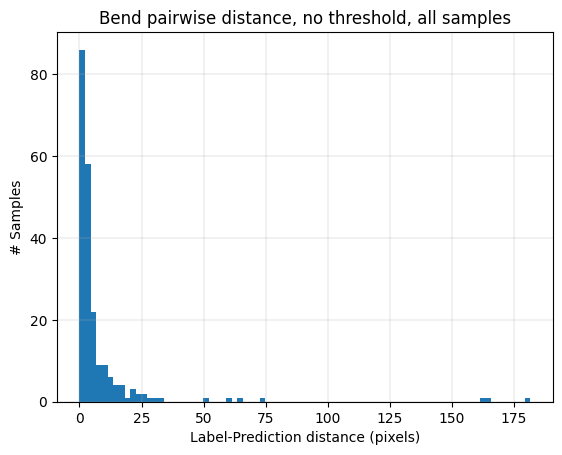

In [ ]:
# Show label-prediction pairwise distance
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
%matplotlib inline

# Convert list of distances to excel file
po = distList_0
# Generate dataframe from list and write to xlsx.
pd.DataFrame(po).to_excel('/content/drive/MyDrive/1429/2D-results/distList-bend-all.xlsx', header=False, index=False)

# Plot the list for all test samples
plt.hist(distList_0, density=False, bins=80)  # density=False would make counts
plt.title('Bend pairwise distance, no threshold, all samples')
plt.ylabel('# Samples')
plt.xlabel('Label-Prediction distance (pixels)');
plt.grid(lw=0.25)
plt.show()


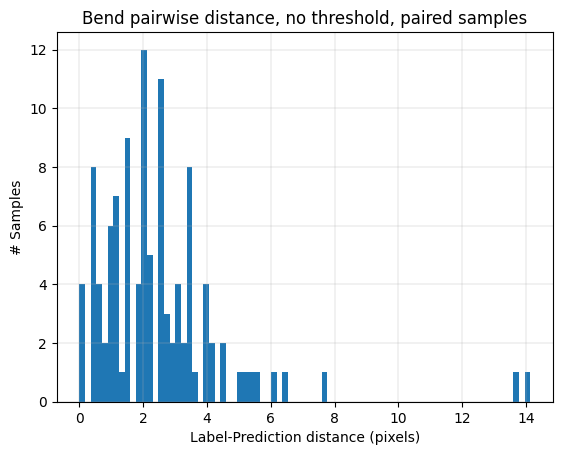

In [ ]:
# Show label-prediction pairwise distance
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
%matplotlib inline

# Convert list of distances to excel file
po = distList_2_0
# Generate dataframe from list and write to xlsx.
pd.DataFrame(po).to_excel('/content/drive/MyDrive/1429/2D-results/distList-bend-LAO90AP.xlsx', header=False, index=False)


# Plot the list for all test samples
plt.hist(distList_2_0, density=False, bins=80)  # density=False would make counts
plt.title('Bend pairwise distance, no threshold, paired samples')
plt.ylabel('# Samples')
plt.xlabel('Label-Prediction distance (pixels)');
plt.grid(lw=0.25)
plt.show()


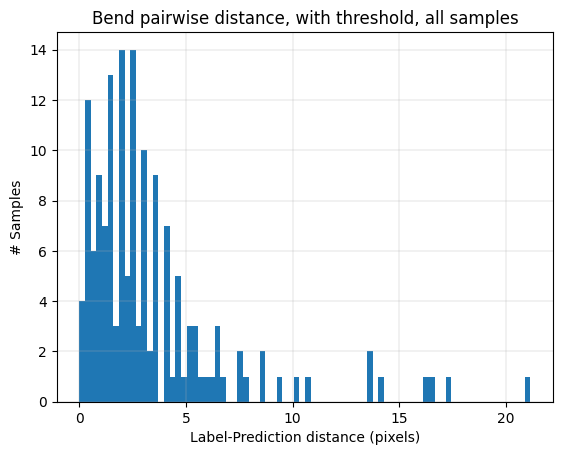

In [ ]:
# Show label-prediction pairwise distance
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
%matplotlib inline

# Convert list of distances to excel file
po = distList_3_0
# Generate dataframe from list and write to xlsx.
pd.DataFrame(po).to_excel('/content/drive/MyDrive/1429/2D-results/distList-bend-all-thresh.xlsx', header=False, index=False)

# Plot the list for all test samples
plt.hist(distList_3_0, density=False, bins=80)  # density=False would make counts
plt.title('Bend pairwise distance, with threshold, all samples')
plt.ylabel('# Samples')
plt.xlabel('Label-Prediction distance (pixels)');
plt.grid(lw=0.25)
plt.show()


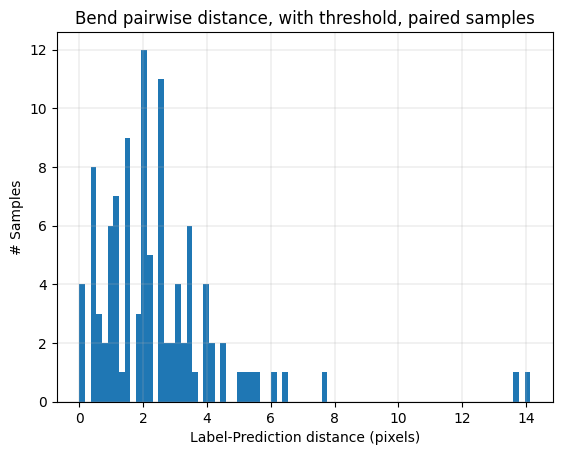

In [ ]:
# Show label-prediction pairwise distance
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
%matplotlib inline

# Convert list of distances to excel file
po = distList_4_0
# Generate dataframe from list and write to xlsx.
pd.DataFrame(po).to_excel('/content/drive/MyDrive/1429/2D-results/distList-bend-LAO90AP-thresh.xlsx', header=False, index=False)


# Plot the list for all test samples
plt.hist(distList_4_0, density=False, bins=80)  # density=False would make counts
plt.title('Bend pairwise distance, with threshold, paired samples')
plt.ylabel('# Samples')
plt.xlabel('Label-Prediction distance (pixels)');
plt.grid(lw=0.25)
plt.show()


### **Save all fields in excel for 3D prediction**

In [ ]:
import os
print ("Current working directory:")
print (os.getcwd())

Current working directory:
/content


In [ ]:
# # We will not need this part as all samples are not paired

# from pandas import DataFrame
# l1 = ls_pred_0_x
# l2 = ls_pred_0_y
# l3 = ls_lbl_0_x
# l4 = ls_lbl_0_y
# l5 = path_k_0

# print(l5)
# # What the 3D prediction function requires: 'x_ID', 'y_ID', 'Px_ID', 'Py_ID', 'model1Pred', 'image_folder_path', 'img_group_name'
# df = DataFrame({'x_ID': l3, 'y_ID': l4, 'Px_ID': l1, 'Py_ID': l2, 'imgID':l5})
# # Save to a path
# df.to_excel('/content/drive/MyDrive/1429/2D-results/output-1429-bend-all.xlsx')
# # Print the excel file
# df

In [ ]:
from pandas import DataFrame
l1 = ls_pred_2_0_x
l2 = ls_pred_2_0_y
l3 = ls_lbl_2_0_x
l4 = ls_lbl_2_0_y
l5 = path_k_2_0

print(l5)
# What the 3D prediction function requires: 'x_ID', 'y_ID', 'Px_ID', 'Py_ID', 'model1Pred', 'image_folder_path', 'img_group_name'
df = DataFrame({'x_ID': l3, 'y_ID': l4, 'Px_ID': l1, 'Py_ID': l2, 'imgID':l5})
# Save to a path
df.to_excel('/content/drive/MyDrive/1429/2D-results/output-1429-bend.xlsx')
# Print the excel file
df

['AP-10003.txt', 'AP-10004.txt', 'AP-10016.txt', 'AP-10028.txt', 'AP-10030.txt', 'AP-10046.txt', 'AP-10061.txt', 'AP-10064.txt', 'AP-10066.txt', 'AP-10089.txt', 'AP-10100.txt', 'AP-10118.txt', 'AP-10127.txt', 'AP-10131.txt', 'AP-20008.txt', 'AP-20011.txt', 'AP-20013.txt', 'AP-20020.txt', 'AP-20021.txt', 'AP-20028.txt', 'AP-20029.txt', 'AP-20036.txt', 'AP-20038.txt', 'AP-20063.txt', 'AP-20067.txt', 'AP-20072.txt', 'AP-20073.txt', 'AP-20078.txt', 'AP-20094.txt', 'AP-20095.txt', 'AP-20106.txt', 'AP-20110.txt', 'AP-20119.txt', 'AP-20120.txt', 'AP-20123.txt', 'AP-20133.txt', 'AP-20135.txt', 'AP-20138.txt', 'AP-20140.txt', 'AP-20141.txt', 'AP-20145.txt', 'AP-20148.txt', 'AP-30017.txt', 'AP-30096.txt', 'AP-30098.txt', 'AP-30103.txt', 'AP-30106.txt', 'AP-30115.txt', 'AP-30120.txt', 'AP-30121.txt', 'AP-30131.txt', 'AP-30132.txt', 'AP-30136.txt', 'AP-30144.txt', 'AP-30146.txt', 'LAO90-10003.txt', 'LAO90-10004.txt', 'LAO90-10016.txt', 'LAO90-10028.txt', 'LAO90-10030.txt', 'LAO90-10046.txt', 'LAO9

,x_ID,y_ID,Px_ID,Py_ID,imgID
0,372.5,497.5,372.00000,499.00032,AP-10003.txt
1,373.0,501.5,372.49984,500.49984,AP-10004.txt
2,373.5,499.0,373.50016,501.50016,AP-10016.txt
3,371.5,504.0,371.50016,503.50016,AP-10028.txt
4,371.0,501.0,370.99968,504.49984,AP-10030.txt
...,...,...,...,...,...
105,387.0,484.0,387.00032,480.49984,LAO90-30131.txt
106,388.5,485.0,389.00032,481.50016,LAO90-30132.txt
107,404.0,477.0,403.50016,478.49984,LAO90-30136.txt
108,415.5,475.0,414.49984,479.00032,LAO90-30144.txt


#### **NOTE: Use this only and only if you want to save the distances for samples with a specific confidence threshold**

In [ ]:
# # We will not need this part as all samples are not paired

# from pandas import DataFrame
# l1 = ls_pred_3_0_x
# l2 = ls_pred_3_0_y
# l3 = ls_lbl_3_0_x
# l4 = ls_lbl_3_0_y
# l5 = path_k_3_0

# print(l5)
# # What the 3D prediction function requires: 'x_ID', 'y_ID', 'Px_ID', 'Py_ID', 'model1Pred', 'image_folder_path', 'img_group_name'
# df = DataFrame({'x_ID': l3, 'y_ID': l4, 'Px_ID': l1, 'Py_ID': l2, 'imgID':l5})
# # Save to a path
# df.to_excel('/content/drive/MyDrive/1429/2D-results/output-1429-bend-all-thresh.xlsx')
# # Print the excel file
# df

In [ ]:
from pandas import DataFrame
l1 = ls_pred_4_0_x
l2 = ls_pred_4_0_y
l3 = ls_lbl_4_0_x
l4 = ls_lbl_4_0_y
l5 = path_k_4_0

print(l5)
# What the 3D prediction function requires: 'x_ID', 'y_ID', 'Px_ID', 'Py_ID', 'model1Pred', 'image_folder_path', 'img_group_name'
df = DataFrame({'x_ID': l3, 'y_ID': l4, 'Px_ID': l1, 'Py_ID': l2, 'imgID':l5})
# Save to a path
df.to_excel('/content/drive/MyDrive/1429/2D-results/output-1429-bend-thresh.xlsx')
# Print the excel file
df

['AP-10003.txt', 'AP-10004.txt', 'AP-10016.txt', 'AP-10028.txt', 'AP-10030.txt', 'AP-10046.txt', 'AP-10061.txt', 'AP-10064.txt', 'AP-10066.txt', 'AP-10089.txt', 'AP-10100.txt', 'AP-10118.txt', 'AP-10127.txt', 'AP-10131.txt', 'AP-20008.txt', 'AP-20011.txt', 'AP-20013.txt', 'AP-20020.txt', 'AP-20021.txt', 'AP-20028.txt', 'AP-20029.txt', 'AP-20036.txt', 'AP-20038.txt', 'AP-20063.txt', 'AP-20067.txt', 'AP-20072.txt', 'AP-20073.txt', 'AP-20078.txt', 'AP-20094.txt', 'AP-20095.txt', 'AP-20106.txt', 'AP-20110.txt', 'AP-20119.txt', 'AP-20120.txt', 'AP-20123.txt', 'AP-20133.txt', 'AP-20135.txt', 'AP-20138.txt', 'AP-20140.txt', 'AP-20141.txt', 'AP-20145.txt', 'AP-20148.txt', 'AP-30017.txt', 'AP-30096.txt', 'AP-30098.txt', 'AP-30103.txt', 'AP-30106.txt', 'AP-30115.txt', 'AP-30120.txt', 'AP-30121.txt', 'AP-30131.txt', 'AP-30132.txt', 'AP-30136.txt', 'AP-30144.txt', 'AP-30146.txt', 'LAO90-10003.txt', 'LAO90-10004.txt', 'LAO90-10016.txt', 'LAO90-10028.txt', 'LAO90-10030.txt', 'LAO90-10046.txt', 'LAO9

,x_ID,y_ID,Px_ID,Py_ID,imgID
0,372.5,497.5,372.00000,499.00032,AP-10003.txt
1,373.0,501.5,372.49984,500.49984,AP-10004.txt
2,373.5,499.0,373.50016,501.50016,AP-10016.txt
3,371.5,504.0,371.50016,503.50016,AP-10028.txt
4,371.0,501.0,370.99968,504.49984,AP-10030.txt
...,...,...,...,...,...
100,397.0,478.0,397.00032,481.50016,LAO90-30120.txt
101,395.0,478.0,395.00032,480.00000,LAO90-30121.txt
102,404.0,477.0,403.50016,478.49984,LAO90-30136.txt
103,415.5,475.0,414.49984,479.00032,LAO90-30144.txt


# **========================= 3D DETECTION =========================**

Notes:

Prior to use of this section, reformat and revise excel files for entry to 3D detection. This includes
- Deleting unpaired items
- Moving AP fields to AP sheet
- Moving LAO90 fields to LAO90 sheet
- Adding an additional column determining whether fields are AP or LAO90

In [ ]:
import os, shutil
import glob
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display
import cv2
from skimage.io import imread
import pandas as pd
import numpy as np
import math
from math import sqrt
import random
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
def get_img_group_name(imgID, method):
    """
    Get the group name of the images and their augmentations

    Parameters:
    imgID: the id of the image
    method: different methods based on different format

    Return:
    image group name
    """
    if method == 1:
        elements = imgID.split('_')
        if len(elements)>2:
            return imgID
        else:
            return elements[0]
    elif method == 2:
        elements = imgID.split('-')
        if len(elements) >= 2:
            return elements[-2] + '-' + elements[-1]
        else:
            return imgID

read x and y coordinates of groundtruth (x_ID and y_ID)
and prediction (Px_ID and Py_ID) and image name (imgID) for all images. data_all includes this information for paired images (from two views)

In [ ]:
# Choose which path to read from

# path = '/content/drive/MyDrive/1429/2D-results/output-1429-entry-thresh.xlsx'
# path = '/content/drive/MyDrive/1429/2D-results/output-1429-bend-thresh.xlsx'
# path = '/content/drive/MyDrive/1429/2D-results/output-1429-marker.xlsx'
path = '/content/drive/MyDrive/1429/2D-results/output-1429-tip-thresh.xlsx'


In [ ]:
import sys
sys.path.append("/content/drive/MyDrive/1429")

import importlib

label_file_path1=[]
label_file_path1.extend(glob.glob(path))
label_file_path2=[]
label_file_path2.extend(glob.glob(path))

data_all1 = []
for i, file_path in enumerate(label_file_path1):
    folder_path = os.path.split(file_path)[0]
    data = pd.read_excel(file_path, sheet_name = 'AP', engine='openpyxl')
    # print(data)
    data['image_folder_path'] = folder_path + '/'
    data['imgID'] = data['imgID'].astype(str)
    # print(path)
    if i==0:
        data['img_group_name'] = data['imgID'].apply(lambda x: get_img_group_name(x, 1))
    else:
        data['img_group_name'] = data['imgID'].apply(lambda x: get_img_group_name(x, 2))

    data_all1.append(data[['x_ID', 'y_ID', 'Px_ID', 'Py_ID', 'image_folder_path', 'img_group_name']])


data_all1 = pd.concat(data_all1)
data_all1.rename({'x_ID': 'x_ID1', 'y_ID': 'y_ID1', 'Px_ID': 'Px_ID1', 'Py_ID': 'Py_ID1'}, axis = 'columns', inplace=True)

data_all2 = []
for i, file_path in enumerate(label_file_path2):
    folder_path = os.path.split(file_path)[0]
    data = pd.read_excel(file_path, sheet_name = 'LAO90', engine='openpyxl')
    data['image_folder_path'] = folder_path + '/'
    data['imgID'] = data['imgID'].astype(str)
    if i==0:
        data['img_group_name'] = data['imgID'].apply(lambda x: get_img_group_name(x, 1))
    else:
        data['img_group_name'] = data['imgID'].apply(lambda x: get_img_group_name(x, 2))

    data_all2.append(data[['x_ID', 'y_ID', 'Px_ID', 'Py_ID', 'image_folder_path', 'img_group_name']])

data_all2 = pd.concat(data_all2)
data_all2.rename({'x_ID': 'x_ID2', 'y_ID': 'y_ID2', 'Px_ID': 'Px_ID2', 'Py_ID': 'Py_ID2'}, axis = 'columns', inplace=True)

print(data_all1.shape, data_all2.shape)
print(data_all1.head(), data_all2.head())
data_all = pd.concat([data_all1, data_all2], axis = 1)
data_all.head

Coordinates in both views

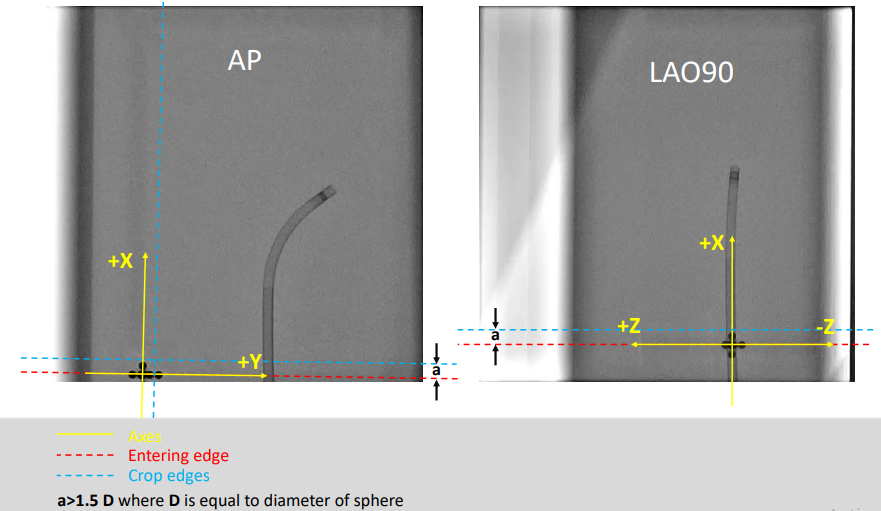

Calculate 3D position in mm and pixel-wise. Then add it to data_all

In [ ]:
APSize = 484
LAO90Size = 444

outputRange = 640

dxAP = 104
dyAP = 19
dxLAO90  = 278
dzLAO90 = 18

Ratio = 3.16 / 11

import pandas as pd
from sympy import symbols, Eq, solve

x_gen_mm = []
y_gen_mm = []
z_gen_mm = []
Px_gen_mm = []
Py_gen_mm = []
Pz_gen_mm = []

x_gen = []
y_gen = []
z_gen = []
Px_gen = []
Py_gen = []
Pz_gen = []

def pixel_mm_3D(APx, APy, LAO90x, LAO90y, Ratio, dxAP, dyAP, dxLAO90, dzLAO90, APSize, LAO90Size, outputRange):
      #if 2 mm in image = 1 pixel, Ratio = 2
      #Origin is the right and up corner
      APx = APx * APSize / outputRange
      APy = APy * APSize / outputRange
      LAO90x = LAO90x * LAO90Size / outputRange
      LAO90y = LAO90y * LAO90Size / outputRange

      x = ((APSize + dyAP - APy) + (LAO90Size + dzLAO90 - LAO90y)) / 2 * Ratio
      y = (APx - dxAP) * Ratio
      z = -1 * (LAO90x - dxLAO90) * Ratio
      return (x, y, z)

def pixel_3D(APx, APy, LAO90x, LAO90y, Ratio, dxAP, dyAP, dxLAO90, dzLAO90, APSize, LAO90Size, outputRange):
      #Origin is the right and up corner
      APx = APx * APSize / outputRange
      APy = APy * APSize / outputRange
      LAO90x = LAO90x * LAO90Size / outputRange
      LAO90y = LAO90y * LAO90Size / outputRange

      x = ((APSize + dyAP - APy) + (LAO90Size + dzLAO90 - LAO90y)) / 2
      y = (APx - dxAP)
      z = -1 * (LAO90x - dxLAO90)
      return (x, y, z)

for i in range(len(data_all)):
      x, y, z = pixel_mm_3D(data_all['x_ID1'][i], data_all['y_ID1'][i], data_all['x_ID2'][i], data_all['y_ID2'][i], Ratio, dxAP, dyAP, dxLAO90, dzLAO90, APSize, LAO90Size, outputRange)
      x_gen_mm.append(x)
      y_gen_mm.append(y)
      z_gen_mm.append(z)
      px, py, pz = pixel_mm_3D(data_all['Px_ID1'][i], data_all['Py_ID1'][i], data_all['Px_ID2'][i], data_all['Py_ID2'][i], Ratio, dxAP, dyAP, dxLAO90, dzLAO90, APSize, LAO90Size, outputRange)
      Px_gen_mm.append(px)
      Py_gen_mm.append(py)
      Pz_gen_mm.append(pz)

      x, y, z = pixel_3D(data_all['x_ID1'][i], data_all['y_ID1'][i], data_all['x_ID2'][i], data_all['y_ID2'][i], Ratio, dxAP, dyAP, dxLAO90, dzLAO90, APSize, LAO90Size, outputRange)
      x_gen.append(x)
      y_gen.append(y)
      z_gen.append(z)
      px, py, pz = pixel_3D(data_all['Px_ID1'][i], data_all['Py_ID1'][i], data_all['Px_ID2'][i], data_all['Py_ID2'][i], Ratio, dxAP, dyAP, dxLAO90, dzLAO90, APSize, LAO90Size, outputRange)
      Px_gen.append(px)
      Py_gen.append(py)
      Pz_gen.append(pz)

x_gen_mm = pd.DataFrame(x_gen_mm, columns = ['x_gen_mm'])
y_gen_mm = pd.DataFrame(y_gen_mm, columns = ['y_gen_mm'])
z_gen_mm = pd.DataFrame(z_gen_mm, columns = ['z_gen_mm'])
Px_gen_mm = pd.DataFrame(Px_gen_mm, columns = ['Px_gen_mm'])
Py_gen_mm = pd.DataFrame(Py_gen_mm, columns = ['Py_gen_mm'])
Pz_gen_mm = pd.DataFrame(Pz_gen_mm, columns = ['Pz_gen_mm'])

x_gen = pd.DataFrame(x_gen, columns = ['x_gen'])
y_gen = pd.DataFrame(y_gen, columns = ['y_gen'])
z_gen = pd.DataFrame(z_gen, columns = ['z_gen'])
Px_gen = pd.DataFrame(Px_gen, columns = ['Px_gen'])
Py_gen = pd.DataFrame(Py_gen, columns = ['Py_gen'])
Pz_gen = pd.DataFrame(Pz_gen, columns = ['Pz_gen'])

data_all = pd.concat([data_all, x_gen_mm, y_gen_mm, z_gen_mm, Px_gen_mm, Py_gen_mm, Pz_gen_mm, x_gen, y_gen, z_gen, Px_gen, Py_gen, Pz_gen], axis = 1)
print(data_all.head())


Calculate distance between predicted and ground truth in all directions and also euclidean distance. These distances are added to data_all

In [ ]:
dist_mm_x = []
dist_mm_y = []
dist_mm_z = []
dist_mm_euclidean = []

dist_x = []
dist_y = []
dist_z = []
dist_euclidean = []

for i in range(len(data_all)):
  a = abs(data_all['x_gen_mm'][i] - data_all['Px_gen_mm'][i])
  b = abs(data_all['y_gen_mm'][i] - data_all['Py_gen_mm'][i])
  c = abs(data_all['z_gen_mm'][i] - data_all['Pz_gen_mm'][i])
  dist_mm_x.append(a)
  dist_mm_y.append(b)
  dist_mm_z.append(c)
  dist_mm_euclidean.append(math.sqrt(a**2 + b**2 + c**2))

  a = abs(data_all['x_gen'][i] - data_all['Px_gen'][i])
  b = abs(data_all['y_gen'][i] - data_all['Py_gen'][i])
  c = abs(data_all['z_gen'][i] - data_all['Pz_gen'][i])
  dist_x.append(a)
  dist_y.append(b)
  dist_z.append(c)
  dist_euclidean.append(math.sqrt(a**2 + b**2 + c**2))

dist_mm_x = pd.DataFrame(dist_mm_x, columns = ['dist_mm_x'])
dist_mm_y = pd.DataFrame(dist_mm_y, columns = ['dist_mm_y'])
dist_mm_z = pd.DataFrame(dist_mm_z, columns = ['dist_mm_z'])
dist_mm_euclidean = pd.DataFrame(dist_mm_euclidean, columns = ['dist_mm_euclidean'])

dist_x = pd.DataFrame(dist_x, columns = ['dist_x'])
dist_y = pd.DataFrame(dist_y, columns = ['dist_y'])
dist_z = pd.DataFrame(dist_z, columns = ['dist_z'])
dist_euclidean = pd.DataFrame(dist_euclidean, columns = ['dist_euclidean'])

data_all = pd.concat([data_all, dist_mm_x, dist_mm_y, dist_mm_z, dist_mm_euclidean, dist_x, dist_y, dist_z, dist_euclidean], axis = 1)

print(data_all.head())

In [ ]:
data_all['dist_mm_euclidean'].mean()

In [ ]:
data_all['dist_mm_euclidean'].std()

In [ ]:
data_all['dist_euclidean'].mean()

In [ ]:
data_all['dist_euclidean'].std()

In [ ]:
# Based on class choose which excel file to write in

# data_all.to_excel('/content/drive/MyDrive/1429/3D-results/3D-entry.xlsx',index = False)
# data_all.to_excel('/content/drive/MyDrive/1429/3D-results/3D-bend.xlsx',index = False)
# data_all.to_excel('/content/drive/MyDrive/1429/3D-results/3D-marker.xlsx',index = False)
data_all.to_excel('/content/drive/MyDrive/1429/3D-results/3D-tip.xlsx',index = False)

# **========================= 2D TRACKING =========================**

### **Apply model on 2D frames and generate video**

In [1]:
# Mount drive to load all samples, train model and GT
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Trained weights are saved by default in our weights folder
%ls drive/MyDrive/1429/yolov5/runs/

detect/  train/


In [3]:
%ls drive/MyDrive/1429/yolov5/runs/train/yolov5s_results/weights

best.pt  last.pt


In [ ]:
import os
def findLabel(path):
  img_dict = {};
  # nested_dict = { 'file_name': {'key_1': 'value_1'},
                # 'dictB': {'key_2': 'value_2'}}
  for id, BBfileName in enumerate(os.listdir(path)):
    # print(id, BBfileName)
    # Insert file name in dictionary
    img_dict[BBfileName]={}

    # Open relevant txt file and find the associated BB labels to test image
    fl = open(path + BBfileName, 'r')
    data = fl.readlines()
    # print(data)
    fl.close()
    # Save each centroid of each BB in the dict
    for dt in data:
      # print('BBfileName:', BBfileName)
      # print('dt:', dt)
      dt = dt.strip()
      # Split string to float and find (x,y) and (w,h)
      _, xx, yy, ww, hh = map(float, dt.split(' '))
      if(dt[0] == '0'):
        # print(dt)
        # Save middle of the BB (prediction)
        img_dict[BBfileName]['cx_0']=xx
        img_dict[BBfileName]['cy_0']=yy
      elif(dt[0] == '1'):
        img_dict[BBfileName]['cx_1']=xx
        img_dict[BBfileName]['cy_1']=yy
      elif(dt[0] == '2'):
        img_dict[BBfileName]['cx_2']=xx
        img_dict[BBfileName]['cy_2']=yy
      elif(dt[0] == '3'):
        img_dict[BBfileName]['cx_3']=xx
        img_dict[BBfileName]['cy_3']=yy

  return(img_dict)


In [ ]:
# import shutil
# shutil.rmtree('/content/drive/MyDrive/1429/yolov5/inferenceTrackingSet/labels/.ipynb_checkpoints')

In [ ]:
p_lbl = "/content/drive/MyDrive/1429/yolov5/inferenceTrackingSet/New/Labels/"
lbl = findLabel(p_lbl)
for i in lbl:
    display
    print(i,lbl[i])
    # print(len(lbl))

LAO90-30017.txt {'cx_3': 0.7484375, 'cy_3': 0.53046875, 'cx_2': 0.728125, 'cy_2': 0.5515625, 'cx_0': 0.61484375, 'cy_0': 0.7921875, 'cx_1': 0.6171875, 'cy_1': 0.99609375}
AP-20110.txt {'cx_3': 0.565625, 'cy_3': 0.57421875, 'cx_2': 0.56640625, 'cy_2': 0.5953125, 'cx_0': 0.5703125, 'cy_0': 0.81015625, 'cx_1': 0.57265625, 'cy_1': 0.996875}
AP-20119.txt {'cx_3': 0.2828125, 'cy_3': 0.809375, 'cx_2': 0.3078125, 'cy_2': 0.7859375, 'cx_0': 0.528125, 'cy_0': 0.821875, 'cx_1': 0.55859375, 'cy_1': 0.9953125}
AP-10016.txt {'cx_3': 0.81796875, 'cy_3': 0.7140625, 'cx_2': 0.7890625, 'cy_2': 0.69921875, 'cx_0': 0.58359375, 'cy_0': 0.7796875, 'cx_1': 0.57109375, 'cy_1': 0.99609375}
LAO90-20148.txt {'cx_3': 0.6359375, 'cy_3': 0.67734375, 'cx_2': 0.6359375, 'cy_2': 0.678125, 'cx_0': 0.6078125, 'cy_0': 0.803125, 'cx_1': 0.60625, 'cy_1': 0.99453125}
LAO90-20073.txt {'cx_1': 0.60625, 'cy_1': 0.9953125, 'cx_0': 0.615625, 'cy_0': 0.5265625, 'cx_2': 0.68828125, 'cy_2': 0.40859375, 'cx_3': 0.70625, 'cy_3': 0.42

In [ ]:
# Clarifying the number of GT fields
len(lbl)

674

#### **Inference**

In [ ]:
# import shutil
# shutil.rmtree('/content/drive/MyDrive/1429/yolov5/runs/detect/exp8')

In [ ]:
# # Please run this once- After first detection run, use only for further experiments
# # Results will be saved in exp(#) folders with confidece, crops and BB prediction text files
%cd drive/MyDrive/1429/yolov5/
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.001 --source inferenceTrackingSet/New/AP --save-crop --save-txt --save-conf

/content/drive/MyDrive/1429/yolov5
detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=inferenceTrackingSet/New/AP, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.001, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: YOLOv5 requirements "gitpython" "ipython" not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.8 MB/s eta 0:00:00

requirements: 2 packages updated per /content/drive/MyDrive/1429/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command f

In [ ]:
# # Please run this once- After first detection run, use only for further experiments
# # Results will be saved in exp(#) folders with confidece, crops and BB prediction text files
# %cd drive/MyDrive/1429/yolov5/
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.001 --source inferenceTrackingSet/New/LAO90 --save-crop --save-txt --save-conf

detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=inferenceTrackingSet/New/LAO90, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.001, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d8 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
custom_YOLOv5s summary: 182 layers, 7254609 parameters, 0 gradients
image 1/337 /content/drive/MyDrive/1429/yolov5/inferenceTrackingSet/New/LAO90/LAO90-10000.jpg: 416x416 3 bends, 1 entry, 3 markers, 2 tips, 457.2ms
image 2/337 /content/drive/MyDrive/1429/yolov5/inferenceTrackingSet/New/LAO90/LAO90-10001.jpg: 416x416 1 bend, 1 entry, 3 markers, 2 tips, 869.8ms
image 3/337 /content/drive/MyDrive/1429/yolov5/inferenceTr

#### **Find highest confidence for each sample and save to variable**

In [ ]:
import os
def findResult(path):
  fileDictionary = {};
  # nested_dict = { 'file_name': {'key_1': 'value_1'},
                # 'dictB': {'key_2': 'value_2'}}
  # print(os.listdir(path))
  for id, BBfileName in enumerate(os.listdir(path)):
    # print(id, BBfileName)
    # Insert file name in dictionary
    fileDictionary[BBfileName]={}
    fileDictionary[BBfileName]['0'] = {}
    fileDictionary[BBfileName]['1'] = {}
    fileDictionary[BBfileName]['2'] = {}
    fileDictionary[BBfileName]['3'] = {}

    # Open relevant txt file and find the associated BB labels to test image
    fl = open(path + BBfileName, 'r')
    data = fl.readlines()
    # print(data)
    fl.close()
    # Save each centroid of each BB in the dict
    for dt in data:
      # print('BBfileName:', BBfileName)
      # print('dt:', dt)
      dt = dt.strip()
      # Split string to float and find (x,y) and (w,h)
      cl, xx, yy, ww, hh, conf = map(float, dt.split(' '))
      # print(cl, xx, yy, ww, hh, conf)
      cl = str(int(cl))
      # print(cl)
      oldClDictionary = fileDictionary[BBfileName][cl]

      max_conf = -1
      best_xx = -1
      best_yy = -1
      best_ww = -1
      best_hh = -1

      if(len(oldClDictionary)>0 and conf<oldClDictionary['cnf']):
        max_conf = oldClDictionary['cnf']
        best_xx = oldClDictionary['xx']
        best_yy = oldClDictionary['yy']
        best_ww = oldClDictionary['ww']
        best_hh = oldClDictionary['hh']

      # # if(oldClDictionary != {}):
      #   if(conf < oldClDictionary['cnf']):
      #     max_conf = oldClDictionary['cnf']
      #     best_xx = oldClDictionary['xx']
      #     best_yy = oldClDictionary['yy']
      #     best_ww = oldClDictionary['ww']
      #     best_hh = oldClDictionary['hh']
      #   else:
      #     max_conf = conf
      #     best_xx = xx
      #     best_yy = yy
      #     best_ww = ww
      #     best_hh = hh
      else:
        max_conf = conf
        best_xx = xx
        best_yy = yy
        best_ww = ww
        best_hh = hh

      newClDictionary = {}
      newClDictionary['cnf'] = max_conf
      newClDictionary['xx'] = best_xx
      newClDictionary['yy'] = best_yy
      newClDictionary['ww'] = best_ww
      newClDictionary['hh'] = best_hh

      fileDictionary[BBfileName][cl] = newClDictionary

  return(fileDictionary)

In [ ]:
resultPath = "/content/drive/MyDrive/1429/yolov5/runs/detect/exp9/labels/"
pred = findResult(resultPath)
for j in pred:
  print(j,pred[j])

len(pred)

AP-10000.txt {'0': {'cnf': 0.802198, 'xx': 0.570312, 'yy': 0.780469, 'ww': 0.03125, 'hh': 0.0234375}, '1': {'cnf': 0.0747646, 'xx': 0.566406, 'yy': 0.996875, 'ww': 0.0296875, 'hh': 0.00625}, '2': {'cnf': 0.872304, 'xx': 0.71875, 'yy': 0.532031, 'ww': 0.03125, 'hh': 0.0328125}, '3': {'cnf': 0.840582, 'xx': 0.75, 'yy': 0.509375, 'ww': 0.021875, 'hh': 0.021875}}
AP-10001.txt {'0': {'cnf': 0.773814, 'xx': 0.564844, 'yy': 0.782031, 'ww': 0.0296875, 'hh': 0.0234375}, '1': {'cnf': 0.0516007, 'xx': 0.564844, 'yy': 0.996875, 'ww': 0.0296875, 'hh': 0.00625}, '2': {'cnf': 0.885702, 'xx': 0.71875, 'yy': 0.535156, 'ww': 0.03125, 'hh': 0.0328125}, '3': {'cnf': 0.831036, 'xx': 0.747656, 'yy': 0.514844, 'ww': 0.0234375, 'hh': 0.0234375}}
AP-10002.txt {'0': {'cnf': 0.737107, 'xx': 0.573438, 'yy': 0.783594, 'ww': 0.03125, 'hh': 0.0234375}, '1': {'cnf': 0.0441153, 'xx': 0.567187, 'yy': 0.996875, 'ww': 0.028125, 'hh': 0.00625}, '2': {'cnf': 0.88137, 'xx': 0.75625, 'yy': 0.564844, 'ww': 0.028125, 'hh': 0.0

337

In [ ]:
resultPath2 = "/content/drive/MyDrive/1429/yolov5/runs/detect/exp10/labels/"
pred2 = findResult(resultPath2)
for j in pred2:
    print(j,pred2[j])

len(pred2)

LAO90-10000.txt {'0': {'cnf': 0.74483, 'xx': 0.617188, 'yy': 0.764063, 'ww': 0.03125, 'hh': 0.025}, '1': {'cnf': 0.0556529, 'xx': 0.619531, 'yy': 0.996094, 'ww': 0.0296875, 'hh': 0.0078125}, '2': {'cnf': 0.874602, 'xx': 0.63125, 'yy': 0.519531, 'ww': 0.03125, 'hh': 0.0296875}, '3': {'cnf': 0.744788, 'xx': 0.632812, 'yy': 0.494531, 'ww': 0.028125, 'hh': 0.0140625}}
LAO90-10001.txt {'0': {'cnf': 0.748283, 'xx': 0.617188, 'yy': 0.764844, 'ww': 0.03125, 'hh': 0.0234375}, '1': {'cnf': 0.0606978, 'xx': 0.619531, 'yy': 0.996094, 'ww': 0.0296875, 'hh': 0.0078125}, '2': {'cnf': 0.870255, 'xx': 0.625781, 'yy': 0.539062, 'ww': 0.0296875, 'hh': 0.028125}, '3': {'cnf': 0.738607, 'xx': 0.627344, 'yy': 0.514844, 'ww': 0.0265625, 'hh': 0.0140625}}
LAO90-10002.txt {'0': {'cnf': 0.721903, 'xx': 0.617188, 'yy': 0.760938, 'ww': 0.03125, 'hh': 0.025}, '1': {'cnf': 0.0474091, 'xx': 0.619531, 'yy': 0.996094, 'ww': 0.0296875, 'hh': 0.0078125}, '2': {'cnf': 0.809475, 'xx': 0.625, 'yy': 0.56875, 'ww': 0.03125, 

337

In [ ]:
# import shutil
# shutil.rmtree('/content/drive/MyDrive/1429/yolov5/runs/detect/exp5/labels/.ipynb_checkpoints')

In [ ]:
# Clarifying the number of PREDICTION fields
print(len(pred))
print(len(pred2))

337
337


In [ ]:
for j in pred:
  fileInfo = pred[j]
  # print(fileInfo)
  if ('xx' in fileInfo['0']):
    fileInfo['0']['xx'] = fileInfo['0']['xx']*640
    fileInfo['0']['yy'] = fileInfo['0']['yy']*640
    fileInfo['0']['ww'] = fileInfo['0']['ww']*640
    fileInfo['0']['hh'] = fileInfo['0']['hh']*640
  if ('xx' in fileInfo['1']):
    fileInfo['1']['xx'] = fileInfo['1']['xx']*640
    fileInfo['1']['yy'] = fileInfo['1']['yy']*640
    fileInfo['1']['ww'] = fileInfo['1']['ww']*640
    fileInfo['1']['hh'] = fileInfo['1']['hh']*640
  if ('xx' in fileInfo['2']):
    fileInfo['2']['xx'] = fileInfo['2']['xx']*640
    fileInfo['2']['yy'] = fileInfo['2']['yy']*640
    fileInfo['2']['ww'] = fileInfo['2']['ww']*640
    fileInfo['2']['hh'] = fileInfo['2']['hh']*640
  if ('xx' in fileInfo['3']):
    fileInfo['3']['xx'] = fileInfo['3']['xx']*640
    fileInfo['3']['yy'] = fileInfo['3']['yy']*640
    fileInfo['3']['ww'] = fileInfo['3']['ww']*640
    fileInfo['3']['hh'] = fileInfo['3']['hh']*640

In [ ]:
for j in pred2:
  fileInfo2 = pred2[j]
  # print(fileInfo2)
  if ('xx' in fileInfo2['0']):
    fileInfo2['0']['xx'] = fileInfo2['0']['xx']*640
    fileInfo2['0']['yy'] = fileInfo2['0']['yy']*640
    fileInfo2['0']['ww'] = fileInfo2['0']['ww']*640
    fileInfo2['0']['hh'] = fileInfo2['0']['hh']*640
  if ('xx' in fileInfo2['1']):
    fileInfo2['1']['xx'] = fileInfo2['1']['xx']*640
    fileInfo2['1']['yy'] = fileInfo2['1']['yy']*640
    fileInfo2['1']['ww'] = fileInfo2['1']['ww']*640
    fileInfo2['1']['hh'] = fileInfo2['1']['hh']*640
  if ('xx' in fileInfo2['2']):
    fileInfo2['2']['xx'] = fileInfo2['2']['xx']*640
    fileInfo2['2']['yy'] = fileInfo2['2']['yy']*640
    fileInfo2['2']['ww'] = fileInfo2['2']['ww']*640
    fileInfo2['2']['hh'] = fileInfo2['2']['hh']*640
  if ('xx' in fileInfo2['3']):
    fileInfo2['3']['xx'] = fileInfo2['3']['xx']*640
    fileInfo2['3']['yy'] = fileInfo2['3']['yy']*640
    fileInfo2['3']['ww'] = fileInfo2['3']['ww']*640
    fileInfo2['3']['hh'] = fileInfo2['3']['hh']*640

In [ ]:
print(len(pred))
print(len(pred2))

337
337


In [ ]:
print(pred2)

{'LAO90-10000.txt': {'0': {'cnf': 0.74483, 'xx': 395.00032, 'yy': 489.00032000000004, 'ww': 20.0, 'hh': 16.0}, '1': {'cnf': 0.0556529, 'xx': 396.49984000000006, 'yy': 637.50016, 'ww': 19.0, 'hh': 5.0}, '2': {'cnf': 0.874602, 'xx': 404.0, 'yy': 332.49983999999995, 'ww': 20.0, 'hh': 19.0}, '3': {'cnf': 0.744788, 'xx': 404.99968, 'yy': 316.49984, 'ww': 18.0, 'hh': 9.0}}, 'LAO90-10001.txt': {'0': {'cnf': 0.748283, 'xx': 395.00032, 'yy': 489.50016, 'ww': 20.0, 'hh': 15.0}, '1': {'cnf': 0.0606978, 'xx': 396.49984000000006, 'yy': 637.50016, 'ww': 19.0, 'hh': 5.0}, '2': {'cnf': 0.870255, 'xx': 400.49984, 'yy': 344.99968, 'ww': 19.0, 'hh': 18.0}, '3': {'cnf': 0.738607, 'xx': 401.50016, 'yy': 329.50016, 'ww': 17.0, 'hh': 9.0}}, 'LAO90-10002.txt': {'0': {'cnf': 0.721903, 'xx': 395.00032, 'yy': 487.00032, 'ww': 20.0, 'hh': 16.0}, '1': {'cnf': 0.0474091, 'xx': 396.49984000000006, 'yy': 637.50016, 'ww': 19.0, 'hh': 5.0}, '2': {'cnf': 0.809475, 'xx': 400.0, 'yy': 364.0, 'ww': 20.0, 'hh': 20.0}, '3': 

In [ ]:
# Read from the dictionary
# Find files in the path
# showcase the predictions on images in the file path
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from google.colab import files

data_path = '/content/drive/MyDrive/1429/yolov5/inferenceTrackingSet/New/AP/'
result_path = '/content/drive/MyDrive/1429/newAPImages/'

for imageName in pred:
  print(imageName)
  # if imageName == 'AP-10000.txt' or imageName == 'AP-10020.txt' or imageName == 'AP-10050.txt':
  # imageInfo = pred[j]
  # print(imageName)
  # print(imageInfo)
  sep = '.'
  strImageName = imageName.split(sep, 1)[0]
  # print(strImageName)

  # Find images' path
  img_path = os.path.join(data_path, strImageName + '.jpg')
  # print(img_path)
  img = Image.open(img_path)
  # plt.imshow(img)
  # imgplot = plt.imshow(img)
  # plt.show()

  # Find images' annotations
  imageInfo = pred[imageName]
  if ('xx' in imageInfo['0']):
    # score_0 = imageInfo['0']['cnf']
    # tlx_0 = imageInfo['0']['xx']
    # tly_0 = imageInfo['0']['yy']
    # w_0 = imageInfo['0']['ww']
    # h_0 = imageInfo['0']['hh']
    # cat_0 = '0'
    # caption_0 = 'bend'

    x0_0 = imageInfo['0']['xx'] - imageInfo['0']['ww'] / 2
    x1_0 = imageInfo['0']['xx'] + imageInfo['0']['ww'] / 2
    y0_0 = imageInfo['0']['yy'] - imageInfo['0']['hh'] / 2
    y1_0 = imageInfo['0']['yy'] + imageInfo['0']['hh'] / 2
    width_0 = int(x1_0-x0_0)
    height_0 = int(y1_0-y0_0)
    rect_0 = patches.Rectangle((int(x0_0), int(y0_0)), width_0, height_0, linewidth=1, edgecolor='c', facecolor='none')

  if ('xx' in imageInfo['1']):
    x0_1 = imageInfo['1']['xx'] - imageInfo['1']['ww'] / 2
    x1_1 = imageInfo['1']['xx'] + imageInfo['1']['ww'] / 2
    y0_1 = imageInfo['1']['yy'] - imageInfo['1']['hh'] / 2
    y1_1 = imageInfo['1']['yy'] + imageInfo['1']['hh'] / 2
    width_1 = int(x1_1-x0_1)
    height_1 = int(y1_1-y0_1)
    rect_1 = patches.Rectangle((int(x0_1), int(y0_1)), width_1, height_1, linewidth=1, edgecolor='r', facecolor='none')

  if ('xx' in imageInfo['2']):
    x0_2 = imageInfo['2']['xx'] - imageInfo['2']['ww'] / 2
    x1_2 = imageInfo['2']['xx'] + imageInfo['2']['ww'] / 2
    y0_2 = imageInfo['2']['yy'] - imageInfo['2']['hh'] / 2
    y1_2 = imageInfo['2']['yy'] + imageInfo['2']['hh'] / 2
    width_2 = int(x1_2-x0_2)
    height_2 = int(y1_2-y0_2)
    rect_2 = patches.Rectangle((int(x0_2), int(y0_2)), width_2, height_2, linewidth=1, edgecolor='b', facecolor='none')

  if ('xx' in imageInfo['3']):
    x0_3 = imageInfo['3']['xx'] - imageInfo['3']['ww'] / 2
    x1_3 = imageInfo['3']['xx'] + imageInfo['3']['ww'] / 2
    y0_3 = imageInfo['3']['yy'] - imageInfo['3']['hh'] / 2
    y1_3 = imageInfo['3']['yy'] + imageInfo['3']['hh'] / 2
    width_3 = int(x1_3-x0_3)
    height_3 = int(y1_3-y0_3)
    rect_3 = patches.Rectangle((int(x0_3), int(y0_3)), width_3, height_3, linewidth=1, edgecolor='m', facecolor='none')

    # Create figure and axes
    fig, ax = plt.subplots()
    # Display the image
    ax.imshow(img)
    # Display the patch on image
    ax.add_patch(rect_0)
    ax.add_patch(rect_1)
    ax.add_patch(rect_2)
    ax.add_patch(rect_3)
    plt.show()
    fig.savefig(result_path + strImageName + '.png', dpi=700)
    # files.download(strImageName + '.png')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Read from the dictionary
# Find files in the path
# showcase the predictions on images in the file path
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from google.colab import files

data_path = '/content/drive/MyDrive/1429/yolov5/inferenceTrackingSet/New/LAO90/'
result_path = '/content/drive/MyDrive/1429/newLAO90Images/'

for imageName in pred2:
  print(imageName)
  # if imageName == 'AP-10000.txt' or imageName == 'AP-10020.txt' or imageName == 'AP-10050.txt':
  # imageInfo = pred[j]
  # print(imageName)
  # print(imageInfo)
  sep = '.'
  strImageName = imageName.split(sep, 1)[0]
  # print(strImageName)

  # Find images' path
  img_path = os.path.join(data_path, strImageName + '.jpg')
  # print(img_path)
  img = Image.open(img_path)
  # plt.imshow(img)
  # imgplot = plt.imshow(img)
  # plt.show()

  # Find images' annotations
  imageInfo = pred2[imageName]
  if ('xx' in imageInfo['0']):
    # score_0 = imageInfo['0']['cnf']
    # tlx_0 = imageInfo['0']['xx']
    # tly_0 = imageInfo['0']['yy']
    # w_0 = imageInfo['0']['ww']
    # h_0 = imageInfo['0']['hh']
    # cat_0 = '0'
    # caption_0 = 'bend'

    x0_0 = imageInfo['0']['xx'] - imageInfo['0']['ww'] / 2
    x1_0 = imageInfo['0']['xx'] + imageInfo['0']['ww'] / 2
    y0_0 = imageInfo['0']['yy'] - imageInfo['0']['hh'] / 2
    y1_0 = imageInfo['0']['yy'] + imageInfo['0']['hh'] / 2
    width_0 = int(x1_0-x0_0)
    height_0 = int(y1_0-y0_0)
    rect_0 = patches.Rectangle((int(x0_0), int(y0_0)), width_0, height_0, linewidth=1, edgecolor='c', facecolor='none')

  if ('xx' in imageInfo['1']):
    x0_1 = imageInfo['1']['xx'] - imageInfo['1']['ww'] / 2
    x1_1 = imageInfo['1']['xx'] + imageInfo['1']['ww'] / 2
    y0_1 = imageInfo['1']['yy'] - imageInfo['1']['hh'] / 2
    y1_1 = imageInfo['1']['yy'] + imageInfo['1']['hh'] / 2
    width_1 = int(x1_1-x0_1)
    height_1 = int(y1_1-y0_1)
    rect_1 = patches.Rectangle((int(x0_1), int(y0_1)), width_1, height_1, linewidth=1, edgecolor='r', facecolor='none')

  if ('xx' in imageInfo['2']):
    x0_2 = imageInfo['2']['xx'] - imageInfo['2']['ww'] / 2
    x1_2 = imageInfo['2']['xx'] + imageInfo['2']['ww'] / 2
    y0_2 = imageInfo['2']['yy'] - imageInfo['2']['hh'] / 2
    y1_2 = imageInfo['2']['yy'] + imageInfo['2']['hh'] / 2
    width_2 = int(x1_2-x0_2)
    height_2 = int(y1_2-y0_2)
    rect_2 = patches.Rectangle((int(x0_2), int(y0_2)), width_2, height_2, linewidth=1, edgecolor='b', facecolor='none')

  if ('xx' in imageInfo['3']):
    x0_3 = imageInfo['3']['xx'] - imageInfo['3']['ww'] / 2
    x1_3 = imageInfo['3']['xx'] + imageInfo['3']['ww'] / 2
    y0_3 = imageInfo['3']['yy'] - imageInfo['3']['hh'] / 2
    y1_3 = imageInfo['3']['yy'] + imageInfo['3']['hh'] / 2
    width_3 = int(x1_3-x0_3)
    height_3 = int(y1_3-y0_3)
    rect_3 = patches.Rectangle((int(x0_3), int(y0_3)), width_3, height_3, linewidth=1, edgecolor='m', facecolor='none')

    # Create figure and axes
    fig, ax = plt.subplots()
    # Display the image
    ax.imshow(img)
    # Display the patch on image
    ax.add_patch(rect_0)
    ax.add_patch(rect_1)
    ax.add_patch(rect_2)
    ax.add_patch(rect_3)
    plt.show()
    fig.savefig(result_path + strImageName + '.png', dpi=700)
    # files.download(strImageName + '.png')

Output hidden; open in https://colab.research.google.com to view.

**Save images as gif**

In [ ]:
import imageio
import os
images = []
path = './drive/MyDrive/1429/newAPImages/'
for imageName in os.listdir(path):
  print(imageName)
  if imageName.endswith(".png"):
    images.append(imageio.imread(path + imageName))

imageio.mimsave('newApTracking.gif', images, duration=10, quality=50)

AP-30037.png


<ipython-input-4-f6791e9123d1>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(path + imageName))


AP-30038.png
AP-30039.png
AP-30040.png
AP-30041.png
AP-30042.png
AP-30043.png
AP-30045.png
AP-30044.png
AP-30046.png
AP-30047.png
AP-30048.png
AP-30050.png
AP-30049.png
AP-10000.png
AP-10001.png
AP-10002.png
AP-10003.png
AP-10004.png
AP-10005.png
AP-10006.png
AP-10007.png
AP-10008.png
AP-10009.png
AP-10010.png
AP-10011.png
AP-10012.png
AP-10014.png
AP-10013.png
AP-10015.png
AP-10017.png
AP-10016.png
AP-10021.png
AP-10019.png
AP-10018.png
AP-10020.png
AP-10028.png
AP-10023.png
AP-10029.png
AP-10022.png
AP-10024.png
AP-10030.png
AP-10027.png
AP-10025.png
AP-10026.png
AP-10031.png
AP-10032.png
AP-10033.png
AP-10034.png
AP-10038.png
AP-10040.png
AP-10041.png
AP-10037.png
AP-10045.png
AP-10043.png
AP-10042.png
AP-10044.png
AP-10039.png
AP-10046.png
AP-10035.png
AP-10036.png
AP-10048.png
AP-10056.png
AP-10055.png
AP-10049.png
AP-10047.png
AP-10050.png
AP-10051.png
AP-10054.png
AP-10052.png
AP-10053.png
AP-10057.png
AP-10059.png
AP-10062.png
AP-10066.png
AP-10060.png
AP-10067.png
AP-10064.png

In [ ]:
import imageio
images = []
path = '/content/drive/MyDrive/1429/newLAO90Images/'
for imageName in os.listdir(path):
  if imageName.endswith(".png"):
    images.append(imageio.imread(imageName))

imageio.mimsave('newLao90Tracking.gif', images, duration=200, quality=500)

**Save images as video**

In [ ]:
import cv2
import os

image_folder = 'drive/MyDrive/1429/APImages/'
video_name = 'apTracking.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 1, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()

In [ ]:
import cv2
import os

image_folder = 'drive/MyDrive/1429/LAO90Images/'
video_name = 'lao90Tracking.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 1, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()

### **Another code for generating the inference images**

In [ ]:
import torch
from matplotlib import pyplot as plt
import cv2
from PIL import Image
import glob

#Model
model = torch.hub.load('/content/drive/MyDrive/1429/yolov5', 'custom', path='drive/MyDrive/1429/yolov5/runs/train/yolov5s_results/weights/best.pt', source='local')  # local repo
# Images
model.conf = 0.01
for imageName in glob.glob('/content/drive/MyDrive/1429/yolov5/inferenceTrackingSet/AP/*.jpg'): #assuming JPG
  img = cv2.imread(imageName)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY )
  # Inference
  results = model(img)  # includes NMS

  # Results
  results.print()
  results.show()

  #results = results.xyxy[0]  # img1 predictions (tensor)
  boxes = results.pandas().xyxy[0]  # img1 predictions (pandas)
  print(results.pandas().xyxy[0])
